# DATA COLLECTION

In [135]:
#libraries
import pandas as pd 
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random

from scipy.stats import shapiro
from scipy.stats import spearmanr


In [136]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [138]:
df = pd.DataFrame(dataset) #dataframe creation

In [139]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# DATA CLEANING

Deletion of duplicated rows.

In [140]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [141]:
df = df.drop_duplicates()

In [142]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns and it is saved in a new dataset named new_df.

In [143]:
new_df = df.copy()

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [144]:
new_df = new_df.replace(
    ["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA],
    np.nan
)

## Handling Missing Values

The dataset contains some missing values. These are not necessarily due to data collection errors — in some cases, they result from the questionnaire structure (skip logic), where certain responses are implicitly determined by previous answers. Therefore, the missing data are assumed to follow a "Missing At Random" (MAR) mechanism rather than being "Missing Completely At Random" (MCAR). 
However, for analytical purposes, we treat them as completely random, assuming no systematic bias is introduced.
Imputation Strategy:
- Categorical variables  -> mode
- Binary variables (0/1) -> mode
- Continuous / Likert-scale variables -> mean if |skew| <= 0.5, else median
- Label columns are excluded from imputation

This approach helps preserve data consistency while minimizing distortion in the overall distribution. Before imputation, null-like string values are normalized to ensure correct detection and replacement.


In [145]:
# ===========================================
# Imputazione basata su simmetria (skewness)
# - Likert/continue: mean se |skew|<=0.5, altrimenti median
# - Categoriali codificate: moda
# - Binari (0/1): moda
# - Labels: non toccare
# - Normalizza null stringhe prima
# ===========================================

# helper
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) definisci gruppi noti
label_cols = [c for c in new_df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in new_df.columns]
binary_cols = [c for c in new_df.columns if c.startswith("dast_")]  # DAST è 0/1
# aggiungi eventuali altre colonne 0/1 rilevate automaticamente
for c in new_df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(new_df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) converti in numerico dove serve (senza toccare labels e categoriche codificate)
numeric_candidates = [c for c in new_df.columns if c not in label_cols]
for c in numeric_candidates:
    new_df[c] = pd.to_numeric(new_df[c], errors="coerce")

# 3) report pre
nan_before = new_df.isna().sum().to_dict()
decisions = []

# 4) imputazioni
# 4a) categoriche codificate -> moda
for c in cat_code_cols:
    if c in new_df.columns:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) binari (DAST + auto-0/1) -> moda
for c in binary_cols:
    if c in new_df.columns and c not in cat_code_cols:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) tutte le altre colonne numeriche -> mean/median in base a skew
for c in new_df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # considera solo colonne numeriche reali
    if not pd.api.types.is_numeric_dtype(new_df[c]):
        continue
    s = new_df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # skewness di Pandas (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    new_df[c] = new_df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) report post
nan_after = new_df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in new_df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.11
              income -> median (|skew|>0.5); skew=1.05
             audit_1 -> median (|skew|>0.5); skew=1.19
             audit_2 -> median (|skew|>0.5); skew=1.04
             audit_3 -> median (|skew|>0.5); skew=1.11
             audit_4 -> median (|skew|>0.5); skew=1.17
             audit_5 -> median (|skew|>0.5); skew=1.05
             audit_6 -> median (|skew|>0.5); skew=1.12
            

In [146]:
new_df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


# EDA (Exploratory Data Analysis)

After creating a data visualization set via a histogram, it is a very useful tool to ensure that the normality requirement is satisfied through Shapiro-Wilk test.
- Histograms allow the visualization of data symmetry (skewness), detection of outliers, and verification that no artificial distortions were introduced during imputation.
- The normality of the distributions for age, gender, education, marital status and income is tested, and all variables showed non-normal distributions. Assessing the normality of these variables is an essential preliminary step, as it guides the selection of appropriate statistical methods for subsequent analyses.


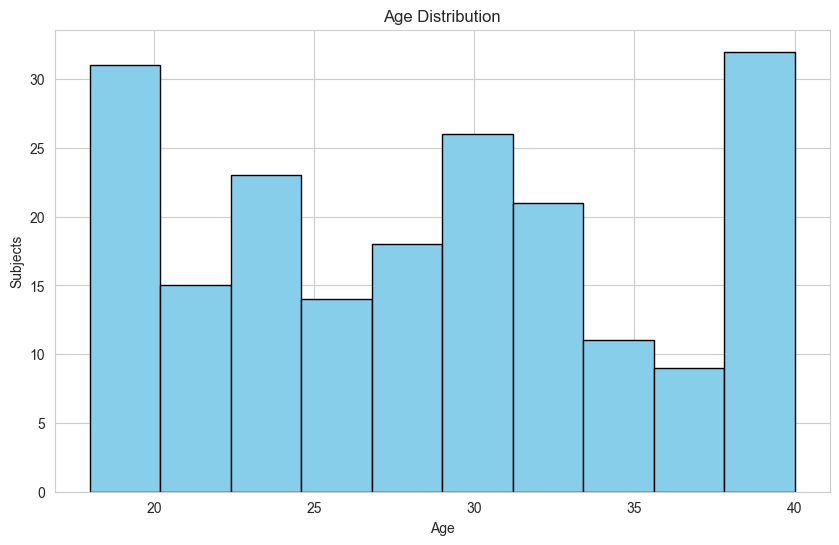

Shapiro-Wilk test statistic: 0.9423
P-value: 0.0000
The age distribution is NOT normal.


In [147]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'age' column
stat, p_value = shapiro(new_df['age'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The age distribution is normal.")
else:
    print("The age distribution is NOT normal.")

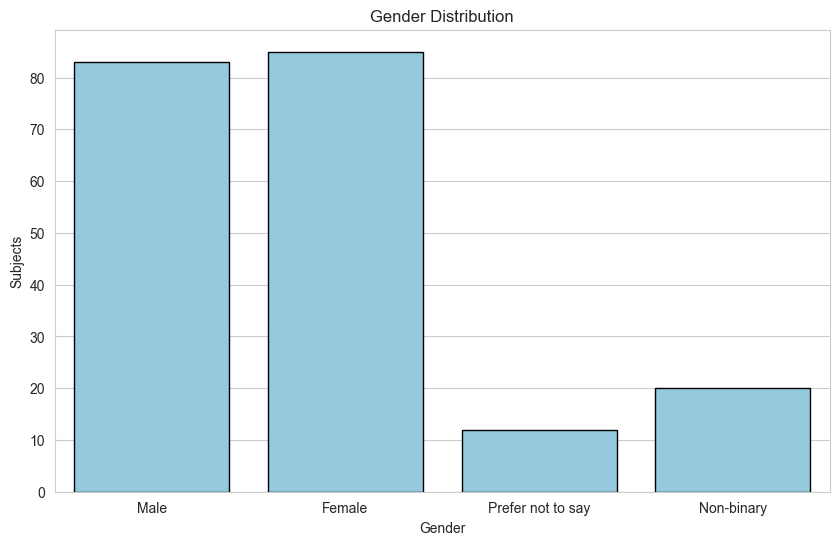

Shapiro-Wilk test statistic: 0.7891
P-value: 0.0000
The gender distribution is NOT normal.


In [148]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
new_df['gender_label'] = new_df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'gender' column
stat, p_value = shapiro(new_df['gender'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The gender distribution is normal.")
else:
    print("The gender distribution is NOT normal.")


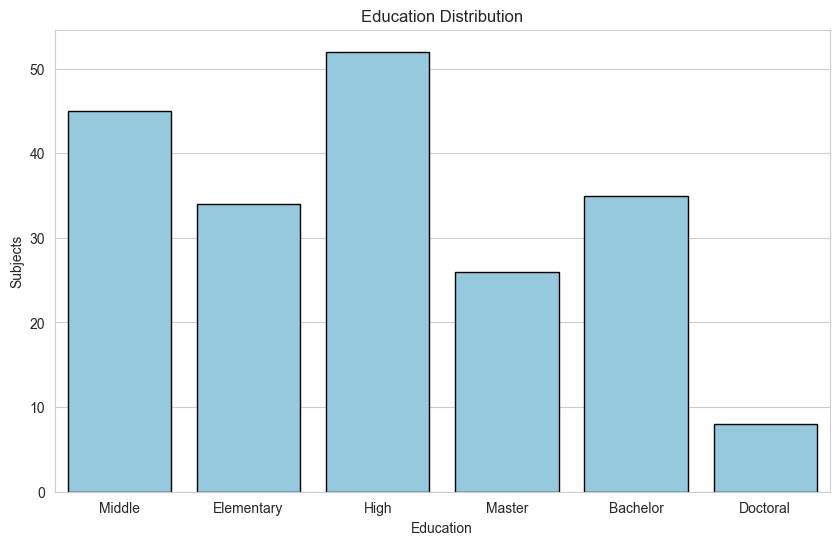

Shapiro-Wilk test statistic: 0.9039
P-value: 0.0000
The education distribution is NOT normal.


In [149]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
new_df['school_labels'] = new_df['education'].map(school_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'education' column
stat, p_value = shapiro(new_df['education'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The education distribution is normal.")
else:
    print("The education distribution is NOT normal.")

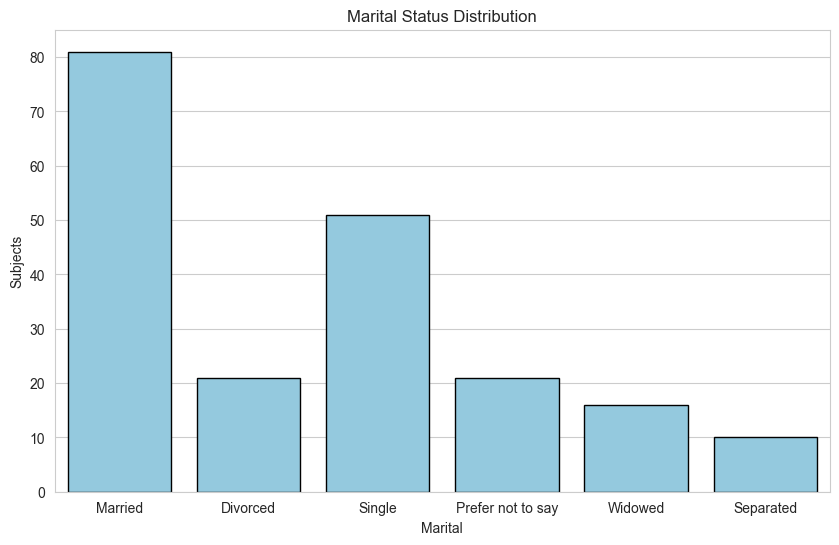

Shapiro-Wilk test statistic: 0.8090
P-value: 0.000000000
The marital status distribution is NOT normal.


In [150]:
#[5] [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
new_df['marital_labels'] = new_df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Status Distribution')
#plt.xticks(rotation=15)
plt.show()

# Apply Shapiro-Wilk test on the 'marital' column
stat, p_value = shapiro(new_df['marital'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.9f}")

if p_value > 0.05:
    print("The marital status distribution is normal.")
else:
    print("The marital status distribution is NOT normal.")

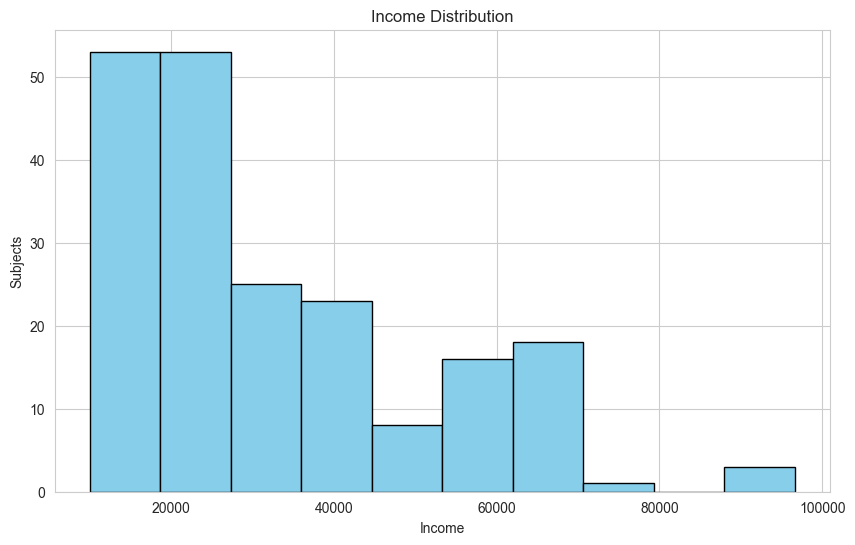

Shapiro-Wilk test statistic: 0.8894
P-value: 0.0000
The income distribution is NOT normal.


In [151]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['income'], color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Subjects')
plt.title('Income Distribution')
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'income' column
stat, p_value = shapiro(new_df['income'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The income distribution is normal.")
else:
    print("The income distribution is NOT normal.")

Verifying the absence of normality supports the use of non-parametric correlation tests (e.g., Spearman’s rho) when exploring relationships between sociodemographic characteristics and behavioral traits relevant to the development of player personas for the game.

## Column processing

In order to focus on internet addiction, let's drop out all the indices related to other addictions:
- dropped columns --> AUDIT (Alcohol Use Disorders Identification Test), DAST (Drug Abuse Screening Test)
- maintained cols --> PGSI (Problem Gambling Severity Index), PCL-5 (PTSD Checklist for DSM-5), MSPSS (Multidimensional Scale of Perceived Social Support), SWLS (Satisfaction With Life Scale), WHO-5 (Well-Being Index)

In [152]:
# Identify columns related to AUDIT, DAST, and PGSI
cols_to_remove = [col for col in new_df.columns if col.lower().startswith(('audit','dast'))]

# Drop those columns
df_filtered = new_df.drop(columns=cols_to_remove)

# Save cleaned dataset
# df_filtered.to_csv('dataset_eHealth20252026_noAUDIT_DAST_PGSI.csv', index=False)

In [153]:
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,2.0,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4.0,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,0.0,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,3.0,4,3.0,2,1.0,2.0,3.0,Female,Master,Single
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,5.0,7,5.0,5,4.0,3.0,3.0,Female,Master,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0.0,0,0.0,3,3.0,3.0,1.0,Male,High,Married
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,4.0,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,1.0,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,4.0,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married


## Shapiro-Wilk test
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

In [154]:
results = []
for i in range(1, 21):
    col = f'iat_{i}'
    data = df_filtered[col].dropna()
    stat, p = shapiro(data)
    results.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results)
result_df.head(10)

,column,statistic,p_value,alpha,normal
0,iat_1,0.901923,3.336925e-10,0.05,False
1,iat_2,0.901642,3.200776e-10,0.05,False
2,iat_3,0.895352,1.284029e-10,0.05,False
3,iat_4,0.883647,2.570883e-11,0.05,False
4,iat_5,0.902375,3.569170e-10,0.05,False
5,iat_6,0.898295,1.959786e-10,0.05,False
6,iat_7,0.887740,4.454975e-11,0.05,False
7,iat_8,0.890957,6.927039e-11,0.05,False
8,iat_9,0.881595,1.960928e-11,0.05,False
9,iat_10,0.865863,2.711615e-12,0.05,False


Since the Shapiro–Wilk tests indicated that the IAT item distributions are not normally distributed (p < 0.05 for all items), a non-parametric correlation measure was considered more appropriate. For this reason, the *Spearman correlation* test was applied to assess the degree of association among the IAT items.

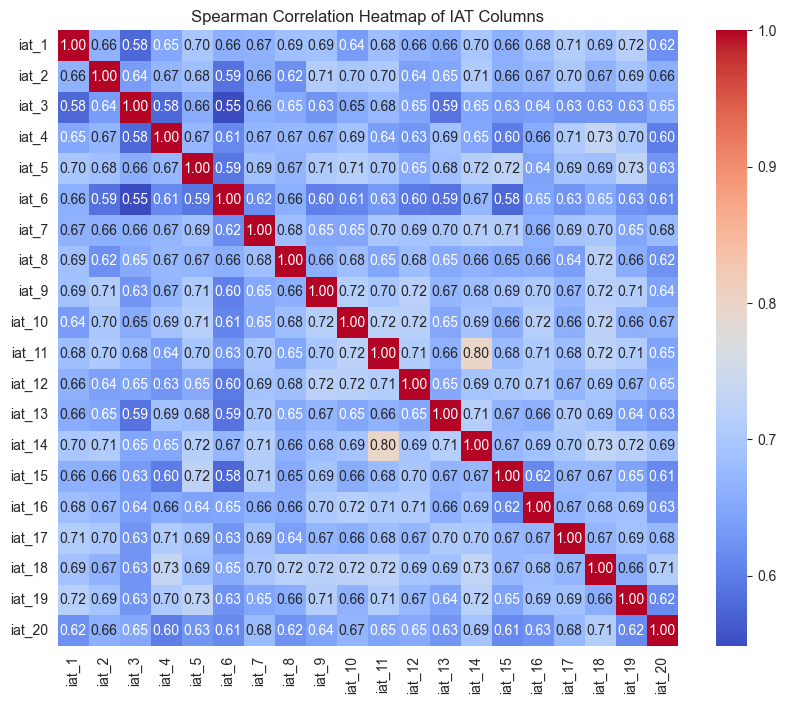

In [155]:
# Select only IAT columns
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_')]
df_iat = df_filtered[iat_cols]

# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_iat = df_iat.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_iat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of IAT Columns")
plt.show()

In [156]:
# Extract upper triangle (excluding diagonal)
corr_values_iat = corr_matrix_iat.where(~np.eye(corr_matrix_iat.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_iat = corr_values_iat.min()
max_corr_iat = corr_values_iat.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_iat:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_iat:.2f}")

Minimum Spearman correlation (excluding diagonal): 0.55
Maximum Spearman correlation (excluding diagonal): 0.80


The strong positive correlations found between the items confirm their internal consistency, meaning that the individual variables tend to measure the same underlying construct. Given this internal coherence, it is therefore reasonable to compute a composite score by summing all IAT item values for each participant. This sum reflects the overall IAT index and serves as a representative measure of the latent trait captured by the individual items.

## Cronbach’s Alpha
The use of Cronbach’s Alpha in this context is justified by the nature of the IAT variables. Each IAT item (iat_1 to iat_20) represents an ordinal or interval-type variable derived from Likert-like responses, all intended to measure the same underlying psychological construct. After verifying that the distributions of the IAT items are not normal through the Shapiro–Wilk test, and that they are strongly intercorrelated based on the Spearman correlation matrix, it is appropriate to assess their internal consistency.
Cronbach’s Alpha provides a reliability coefficient that quantifies how closely related a set of items are as a group. In other words, it measures the degree to which all the IAT items collectively capture the same latent dimension. A high alpha value (typically above 0.9) indicates excellent internal consistency, confirming that the items can be combined into a single composite score.
For this reason, computing Cronbach’s Alpha allows us to statistically validate the decision to aggregate all IAT items into a single index by summing their values for each participant. This composite IAT score can then be interpreted as a reliable representation of the overall construct measured by the individual items.

https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [157]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


## IAT

In [158]:
cronbach_alpha(df_iat)

np.float64(0.9728868862081862)

In [159]:
#specify the columns to sum
cols_to_sum = [col for col in df_filtered.columns if col.lower().startswith(('iat'))]

#define new column that contains sum of specific columns
df_filtered['sum_iat'] = df_filtered[cols_to_sum].sum(axis=1)

#view updated DataFrame
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,4,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,7,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000


In [160]:
cols_to_keep = [col for col in df_filtered.columns if not col.lower().startswith('iat') or col == 'sum_iat']
df_filtered = df_filtered[cols_to_keep]
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,4,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,7,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000


IAT Author guidelines recommend that participants scoring less than 40 be categorized as average users, those scoring 40 or above be categorized as problematic internet users, and those scoring 70 or above be categorized as severely problematic users (Young, 1998).

C:\Users\User\AppData\Local\Temp\ipykernel_32452\2736144530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)
C:\Users\User\AppData\Local\Temp\ipykernel_32452\2736144530.py:25: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


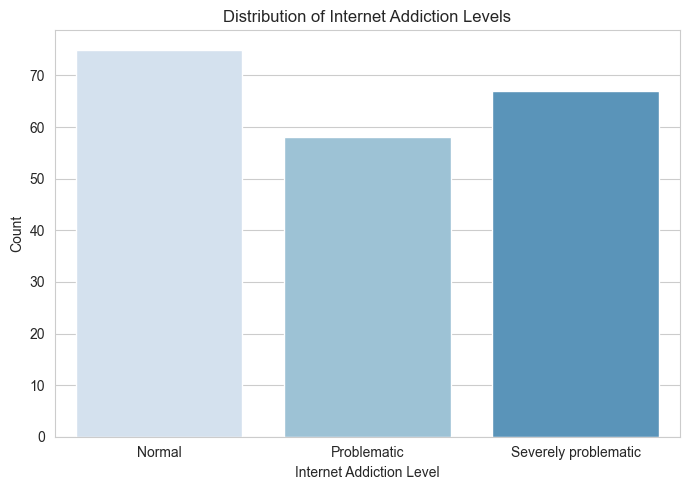

(None,
 addiction_level
 Normal                  75
 Severely problematic    67
 Problematic             58
 Name: count, dtype: int64)

In [161]:
# Define addiction levels based on sum_iat cut-offs
def classify_iat(total):
    if total <= 39:
        return 'Normal'
    elif total <= 69:
        return 'Problematic'
    else:
        return 'Severely problematic'

# Apply classification
df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)

# Group and count occurrences
# Prepare data as DataFrame with explicit columns
order = ['Normal', 'Problematic', 'Severely problematic']
grouped = df_filtered['addiction_level'].value_counts().reindex(order).reset_index() 
# reindex Ensures the Series is re-ordered to match your custom order list (['Normal', 'Problematic', 'Severely problematic']). 

grouped.columns = ['addiction_level', 'count']

# Create the blue gradient palette and create the barplot
blue_palette = sns.color_palette("Blues", n_colors=4)

plt.figure(figsize=(7,5))
sns.barplot(
    data=grouped,
    x='addiction_level',
    y='count',
    hue='addiction_level',
    palette=blue_palette,
    dodge=False,       # Avoids stacked bars
    order=order,
    legend=False
)
plt.xlabel('Internet Addiction Level')
plt.ylabel('Count')
plt.title('Distribution of Internet Addiction Levels')
plt.tight_layout()

plt.show(), df_filtered['addiction_level'].value_counts()

According to IAT Author guidelines there are 75 average users, 58 problematic internet users and 67 severely problematic users in the filtered_df.

## Other psychometric instruments

In [162]:
pgsi_cols = [col for col in df_filtered.columns if col.startswith('pgsi_')]
df_pgsi = df_filtered[pgsi_cols]

pcl5_cols = [col for col in df_filtered.columns if col.startswith('pcl5_')]
df_pcl5 = df_filtered[pcl5_cols]

mspss_cols = [col for col in df_filtered.columns if col.startswith('mspss_')]
df_mspss = df[mspss_cols]

swls_cols = [col for col in df_filtered.columns if col.startswith('swls_')]
df_swls = df[swls_cols]

who5_cols = [col for col in df_filtered.columns if col.startswith('who5_')]
df_who5 = df[who5_cols]

In addition to the IAT, the internal consistency of the other psychometric instruments included in the dataset — namely the WHO-5, MSPSS, SWLS, PCL-5, and PGSI — was assessed using Cronbach’s Alpha. Each of these scales is composed of multiple items rated on a numerical or Likert-type scale, and therefore lends itself to this type of reliability analysis. The Cronbach’s Alpha coefficient provides an estimate of the degree of internal correlation among the items within each instrument, indicating how well they jointly measure the same underlying construct.

In [163]:
cronbach_alpha(df_pgsi), cronbach_alpha(df_pcl5), cronbach_alpha(df_mspss), cronbach_alpha(df_swls), cronbach_alpha(df_who5)

(np.float64(0.8935404063641771),
 np.float64(0.9817491160882883),
 np.float64(0.8841251144236355),
 np.float64(0.7820273835058027),
 np.float64(0.6198655116723186))

The results indicated excellent consistency for the PCL-5 (α = 0.98), good consistency for PGSI (α = 0.89) and MSPSS (α = 0.88) scales, acceptable consistency for the SWLS (α = 0.78) and questionable consistency for the WHO-5 (α = 0.62).
These findings confirm that, overall, the items within each scale consistently measure their intended construct. However, the relatively lower coefficient for the WHO-5 suggests a broader conceptual coverage of well-being, possibly reflecting different facets of positive affect and life satisfaction.

Based on the Cronbach’s Alpha results, the next analytical step was defined according to the internal reliability of each psychometric instrument. 
Scales showing excellent internal consistency (α ≥ 0.9), such as the PCL-5 (α = 0.98), were considered highly homogeneous and unidimensional. In such cases, further item-level correlation analyses were deemed unnecessary, as the items are already strongly interrelated and reflect a single underlying construct.
For scales with good to very good reliability (0.7 ≤ α < 0.9) — including the PGSI (α = 0.89), MSPSS (α = 0.88), and SWLS (α = 0.78) — item-level Spearman correlations were examined to confirm internal coherence and to explore the relative contribution of individual items to the overall construct.
Finally, for the WHO-5 (α = 0.62), whose internal consistency was acceptable but comparatively lower, item-level correlations were computed to better understand the heterogeneity among items and the potential multidimensionality of the well-being construct.

After these reliability-driven evaluations, Spearman correlations between the total scores of all psychometric instruments were computed to assess inter-construct relationships. This two-step approach — reliability check followed by inter-scale correlation — ensures that each scale is internally coherent while verifying that the constructs measured are distinct and non-redundant.

### PGSI

In [164]:
results_pgsi = []
for i in range(1, 10):
    col = f'pgsi_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_pgsi.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_pgsi)
result_df

,column,statistic,p_value,alpha,normal
0,pgsi_1,0.666353,1.229168e-19,0.05,False
1,pgsi_2,0.679333,2.809391e-19,0.05,False
2,pgsi_3,0.660211,8.382582e-20,0.05,False
3,pgsi_4,0.670123,1.558793e-19,0.05,False
4,pgsi_5,0.640373,2.520194e-20,0.05,False
5,pgsi_6,0.676561,2.349786e-19,0.05,False
6,pgsi_7,0.656883,6.827087e-20,0.05,False
7,pgsi_8,0.649518,4.357854e-20,0.05,False
8,pgsi_9,0.647068,3.759280e-20,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.25
Maximum Spearman correlation (excluding diagonal): 0.51


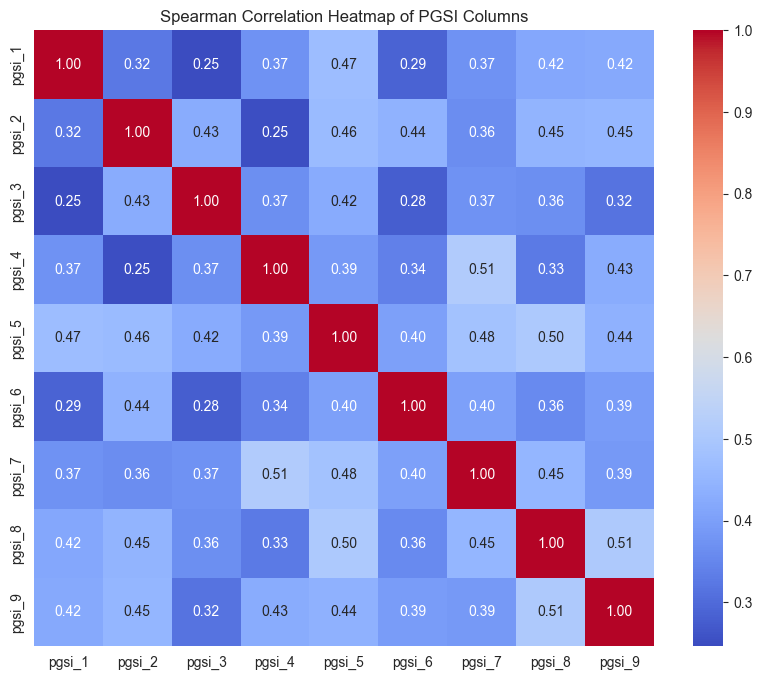

In [165]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_pgsi = df_pgsi.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_pgsi = corr_matrix_pgsi.where(~np.eye(corr_matrix_pgsi.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_pgsi = corr_values_pgsi.min()
max_corr_pgsi = corr_values_pgsi.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_pgsi:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_pgsi:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pgsi, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of PGSI Columns")
plt.show()

For the PGSI, the internal consistency was excellent (Cronbach’s α = 0.89), confirming that the items coherently measure the underlying construct of problem gambling.
The inter-item Spearman correlations ranged between ρ = 0.25 and ρ = 0.51, indicating moderate positive associations among items. This range supports the Alpha result, showing that while the items are sufficiently related to form a reliable scale, they are not redundant.
Such a pattern reflects a balanced internal structure, where each item contributes unique yet coherent information to the overall score.

### MSPSS

The MSPSS demonstrated good overall internal consistency (Cronbach’s α = 0.884), indicating that the items reliably measure perceived social support. To explore the multidimensional structure of the scale, we examined the internal correlations within each subscale: Significant Other, Family, and Friends.

In [166]:
results_mspss = []
for i in range(1, 13):
    col = f'mspss_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_mspss.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_mspss)
result_df

,column,statistic,p_value,alpha,normal
0,mspss_1,0.842697,1.927019e-13,0.05,False
1,mspss_2,0.852754,5.862194e-13,0.05,False
2,mspss_3,0.834314,7.910998e-14,0.05,False
3,mspss_4,0.834879,8.392332e-14,0.05,False
4,mspss_5,0.866260,2.844809e-12,0.05,False
5,mspss_6,0.847771,3.356605e-13,0.05,False
6,mspss_7,0.835029,8.525084e-14,0.05,False
7,mspss_8,0.856342,8.829355e-13,0.05,False
8,mspss_9,0.839793,1.410390e-13,0.05,False
9,mspss_10,0.834628,8.175248e-14,0.05,False


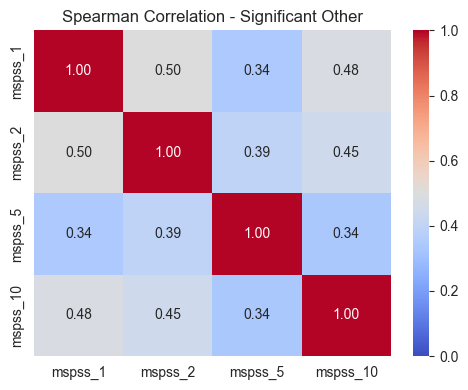

Significant Other - Minimum Spearman correlation (excluding diagonal): 0.34
Significant Other - Maximum Spearman correlation (excluding diagonal): 0.50


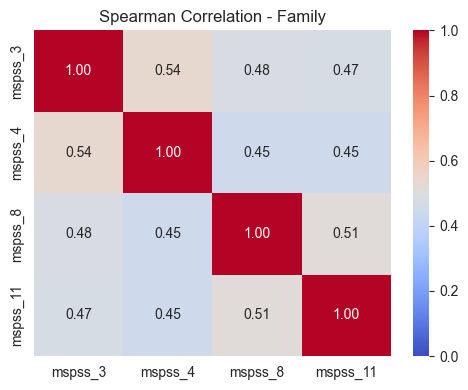

Family - Minimum Spearman correlation (excluding diagonal): 0.45
Family - Maximum Spearman correlation (excluding diagonal): 0.54


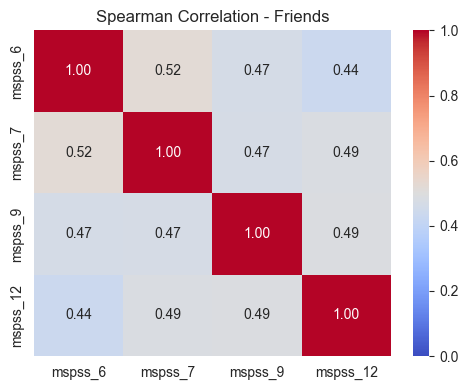

Friends - Minimum Spearman correlation (excluding diagonal): 0.44
Friends - Maximum Spearman correlation (excluding diagonal): 0.52


In [167]:
# Define the subgroups
so_items = [f"mspss_{i}" for i in [1, 2, 5, 10] if f"mspss_{i}" in df_filtered.columns]  # Significant Other
fa_items = [f"mspss_{i}" for i in [3, 4, 8, 11] if f"mspss_{i}" in df_filtered.columns]  # Family
fr_items = [f"mspss_{i}" for i in [6, 7, 9, 12] if f"mspss_{i}" in df_filtered.columns]  # Friends

# Function to plot heatmap
def plot_heatmap(name, cols):
    if not cols:
        print(f"⚠️ No columns found for {name}.")
        return
    corr = df[cols].corr(method='spearman')
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
    plt.title(f"Spearman Correlation - {name}")
    plt.tight_layout()
    plt.show()
    
    # Extract upper triangle (excluding diagonal)
    corr_values = corr.where(~np.eye(corr.shape[0], dtype=bool)).stack()
    
    # Compute min and max
    min_corr = corr_values.min()
    max_corr = corr_values.max()
    
    print(f"{name} - Minimum Spearman correlation (excluding diagonal): {min_corr:.2f}")
    print(f"{name} - Maximum Spearman correlation (excluding diagonal): {max_corr:.2f}")

# Plot heatmaps for each subgroup 
plot_heatmap("Significant Other", so_items)
plot_heatmap("Family", fa_items)
plot_heatmap("Friends", fr_items)

Spearman correlation analyses revealed that within-subscale item correlations were moderate. For the Significant Other subscale, correlations ranged from ρ = 0.34 to 0.50; for Family, from ρ = 0.45 to 0.54; and for Friends, from ρ = 0.44 to 0.52. 
These values suggest that while items within each subscale are related, they are not redundant, reflecting a coherent but diverse measurement of each social support domain.
Overall, the pattern of correlations supports the multidimensional structure of the MSPSS: the subscales capture related but distinct facets of perceived social support, with sufficient internal coherence to justify their use as separate subscale scores.

### SWLS

In [168]:
results_swls = []
for i in range(1, 6):
    col = f'swls_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_swls.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_swls)
result_df

,column,statistic,p_value,alpha,normal
0,swls_1,0.905141,5.408625e-10,0.05,False
1,swls_2,0.913038,1.852238e-09,0.05,False
2,swls_3,0.915247,2.646691e-09,0.05,False
3,swls_4,0.910480,1.233961e-09,0.05,False
4,swls_5,0.913822,2.100912e-09,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.32
Maximum Spearman correlation (excluding diagonal): 0.50


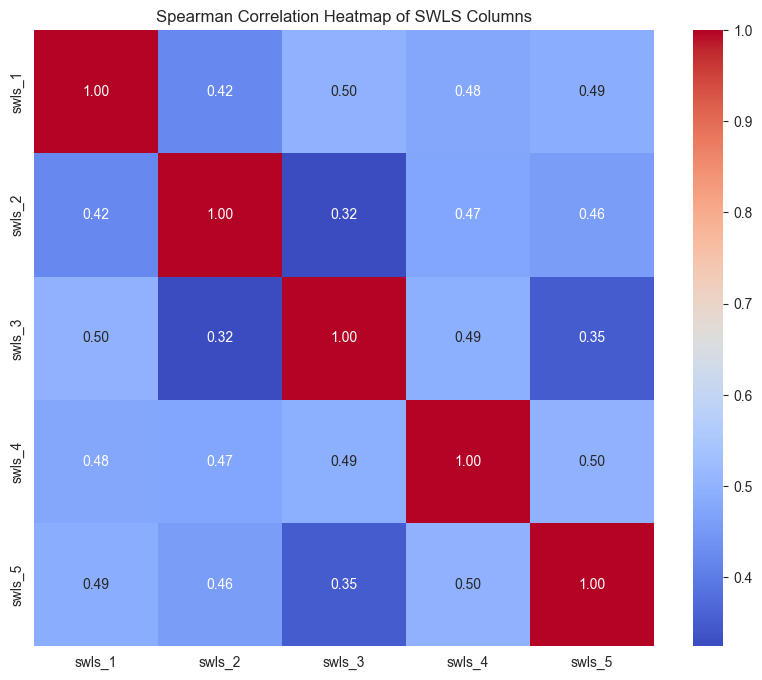

In [169]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_swls = df_swls.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_swls = corr_matrix_swls.where(~np.eye(corr_matrix_swls.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_swls = corr_values_swls.min()
max_corr_swls = corr_values_swls.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_swls:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_swls:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_swls, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of SWLS Columns")
plt.show()

Within-scale item correlations were moderate, with Spearman values ranging from ρ = 0.32 to 0.50. This pattern suggests that while the items are positively related, they are not redundant, providing complementary information about the construct of life satisfaction.

### WHO_5

In [170]:
results_who5 = []
for i in range(1, 6):
    col = f'who5_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_who5.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_who5)
result_df

,column,statistic,p_value,alpha,normal
0,who5_1,0.910502,1.238197e-09,0.05,False
1,who5_2,0.891271,7.235471e-11,0.05,False
2,who5_3,0.884698,2.956836e-11,0.05,False
3,who5_4,0.893980,1.057137e-10,0.05,False
4,who5_5,0.893064,9.292637e-11,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.16
Maximum Spearman correlation (excluding diagonal): 0.35


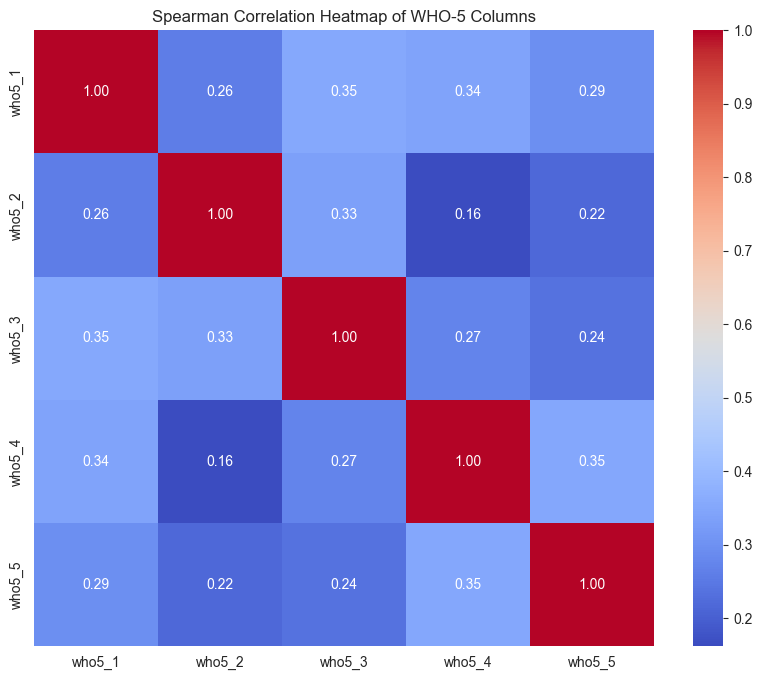

In [171]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_who5 = df_who5.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_who5 = corr_matrix_who5.where(~np.eye(corr_matrix_who5.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_who5 = corr_values_who5.min()
max_corr_who5 = corr_values_who5.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_who5:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_who5:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_who5, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of WHO-5 Columns")
plt.show()

Within-scale Spearman correlations ranged from ρ = 0.16 to 0.35, suggesting that the items are only weakly to moderately related. This pattern reflects a broader conceptual coverage of well-being, capturing different facets of positive affect and life satisfaction, and highlights the potential multidimensionality of the construct measured by the WHO-5.

## Correlation between IAT and other pshycometric instruments

In [172]:
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat,addiction_level
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000,Normal
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000,Normal
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000,Problematic
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000,Problematic
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000,Problematic
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000,Problematic
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000,Normal
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000,Problematic


### AGE

The IAT total score was analyzed across different age groups to explore potential demographic effects.
Since both variables were non-normally distributed, as previously demonstrated, a non-parametric Kruskal–Wallis test was used.
Visual inspection through boxplots and the statistical test allow to assess whether the level of Internet addiction significantly differs among age categories.

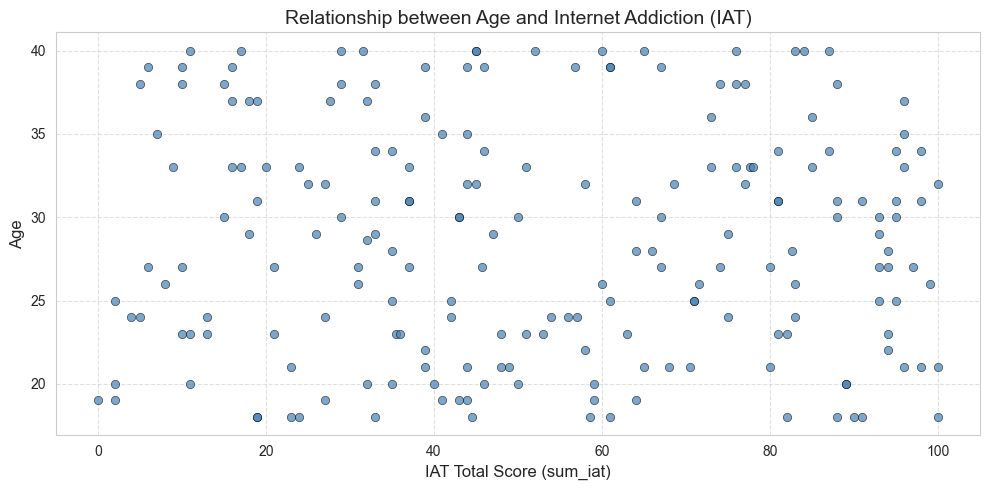

Spearman's correlation coefficient: -0.020
p-value: 0.783


In [173]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df_filtered['sum_iat'],
    y=df_filtered['age'],
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relationship between Age and Internet Addiction (IAT)', fontsize=14)
plt.xlabel('IAT Total Score (sum_iat)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Spearman correlation test
spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered['age'])

print(f"Spearman's correlation coefficient: {spearman_corr:.3f}")
print(f"p-value: {spearman_p_value:.3f}")

No significant correlation was found between participants’ age and their Internet Addiction Test (IAT) scores (ρ = -0.02, p = 0.783).
This indicates that, within this sample, the level of Internet addiction does not appear to vary with age.

### GENDER

🧭 Uso il DataFrame: df_filtered
=== Descrittive sum_iat per Gender ===
                    n  median   mean    std
gender_label                               
Male               83    44.0  48.77  28.93
Female             85    61.0  58.83  28.68
Non-binary         20    42.5  39.45  22.38
Prefer not to say  12    66.0  56.50  30.05

--- Kruskal–Wallis (k=4 gruppi) ---
H = 9.724, df = 3, p = 0.0211
Effect size: epsilon-squared ε² = 0.034

=== Post-hoc pairwise Mann–Whitney (p corretti Holm–Bonferroni) ===
   Group_A           Group_B  n_A  n_B      U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
    Female        Non-binary   85   20 1195.0 0.0049          -0.4059         -21.0  0.0296
      Male            Female   83   85 2808.5 0.0226           0.2038          11.0  0.1131
Non-binary Prefer not to say   20   12   83.0 0.1553           0.3083          23.0  0.6211
      Male        Non-binary   83   20  948.0 0.3272          -0.1422          -8.0  0.9816
      Male Prefer not to say 

C:\Users\User\AppData\Local\Temp\ipykernel_32452\287917496.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


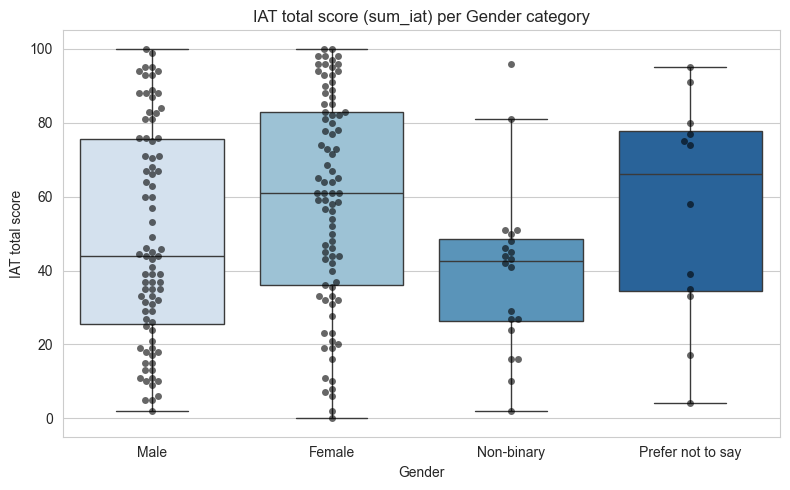

In [174]:
### Analisi non parametrica di `sum_iat` per `gender` (4 categorie)
# - Selezione automatica del DataFrame: df_filtered → new_df → df
# - Usa Kruskal–Wallis per ≥3 gruppi (qui 4) + post-hoc Mann–Whitney con Holm
# - Se per caso ci fossero solo 2 gruppi, usa direttamente Mann–Whitney U
# - Effetti: ε² (omnibus), rank-biserial r (pairwise), HL (differenza robusta)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, kruskal
import itertools

# ------------------------------------------------------
# 1) Scegli il DataFrame disponibile
# ------------------------------------------------------
base_df = None
for name in ("df_filtered", "new_df", "df"):
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        base_df = globals()[name]
        print(f"🧭 Uso il DataFrame: {name}")
        break

if base_df is None:
    raise RuntimeError("Nessun DataFrame trovato (df_filtered / new_df / df). Esegui prima le celle di caricamento.")

# Verifica colonne richieste
required = {"gender", "sum_iat"}
missing = required - set(base_df.columns)
if missing:
    raise RuntimeError(
        f"Mancano le colonne richieste: {missing}. Assicurati che `sum_iat` e `gender` siano nel DataFrame.")

# ------------------------------------------------------
# 2) Prepara i dati
# ------------------------------------------------------
gender_labels = {0: "Male", 1: "Female", 2: "Non-binary", 3: "Prefer not to say"}

df_gender = (
    base_df[["gender", "sum_iat"]]
    .apply(pd.to_numeric, errors="coerce")
    .dropna(subset=["gender", "sum_iat"])
    .copy()
)
df_gender["gender_label"] = df_gender["gender"].map(gender_labels)

order_all = ["Male", "Female", "Non-binary", "Prefer not to say"]
present_groups = [g for g in order_all if g in df_gender["gender_label"].unique().tolist()]
if len(present_groups) < 2:
    raise RuntimeError("Servono almeno 2 categorie di gender con dati non nulli.")

# ------------------------------------------------------
# 3) Descrittive
# ------------------------------------------------------
desc = (
    df_gender.groupby("gender_label")["sum_iat"]
    .agg(n="count", median="median", mean="mean", std="std")
    .reindex(order_all)
)
print("=== Descrittive sum_iat per Gender ===")
print(desc.round(2).fillna(""))

# ------------------------------------------------------
# 4) Test: 2 gruppi → MW, ≥3 gruppi → KW + post-hoc
# ------------------------------------------------------
if len(present_groups) == 2:
    # ----- Mann–Whitney U -----
    g1, g2 = present_groups
    a = df_gender.loc[df_gender["gender_label"] == g1, "sum_iat"].values
    b = df_gender.loc[df_gender["gender_label"] == g2, "sum_iat"].values

    U, p = mannwhitneyu(a, b, alternative="two-sided", method="auto")
    r_rb = 1 - (2 * U) / (len(a) * len(b))  # rank-biserial

    print(f"\n--- Mann–Whitney U test ({g1} vs {g2}) ---")
    print(f"U = {U:.2f}, p = {p:.4f}, rank-biserial r = {r_rb:.3f}")

else:
    # ----- Kruskal–Wallis (omnibus) -----
    groups = [df_gender.loc[df_gender["gender_label"] == g, "sum_iat"].values for g in present_groups]
    H, p_kw = kruskal(*groups)
    n_tot = sum(len(g) for g in groups)
    k = len(groups)
    eps2 = (H - k + 1) / (n_tot - k) if (n_tot - k) > 0 else np.nan  # epsilon-squared (bias-corrected)

    print(f"\n--- Kruskal–Wallis (k={k} gruppi) ---")
    print(f"H = {H:.3f}, df = {k - 1}, p = {p_kw:.4f}")
    print(f"Effect size: epsilon-squared ε² = {eps2:.3f}")


    # ---------- Post-hoc pairwise: Mann–Whitney + Holm ----------
    def rank_biserial_from_U(U, n1, n2):
        return 1 - (2 * U) / (n1 * n2)


    def hodges_lehmann(a, b):
        # mediana di tutte le differenze (b - a)
        return float(np.median(np.subtract.outer(b, a).ravel()))


    def holm_bonferroni(pvals):
        m = len(pvals)
        order = np.argsort(pvals)
        p_sorted = np.array(pvals)[order]
        adj = np.empty(m, dtype=float)
        running_max = 0.0
        for i, p in enumerate(p_sorted):
            val = (m - i) * p
            running_max = max(running_max, val)
            adj[i] = min(1.0, running_max)
        p_adj = np.empty(m, dtype=float)
        p_adj[order] = adj
        return p_adj


    pairs = []
    for gA, gB in itertools.combinations(present_groups, 2):
        A = df_gender.loc[df_gender["gender_label"] == gA, "sum_iat"].values
        B = df_gender.loc[df_gender["gender_label"] == gB, "sum_iat"].values
        U, p_raw = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        hl = hodges_lehmann(A, B)
        pairs.append({
            "Group_A": gA, "Group_B": gB,
            "n_A": len(A), "n_B": len(B),
            "U": float(U), "p_raw": float(p_raw),
            "r_rank_biserial": float(r_rb),
            "HL_diff(B-A)": float(hl)
        })

    pairs_df = pd.DataFrame(pairs)
    pairs_df["p_holm"] = holm_bonferroni(pairs_df["p_raw"].values)
    pairs_df = pairs_df.sort_values("p_holm").reset_index(drop=True)

    print("\n=== Post-hoc pairwise Mann–Whitney (p corretti Holm–Bonferroni) ===")
    print(pairs_df.round(4).to_string(index=False))

    sig_pairs = pairs_df[pairs_df["p_holm"] < 0.05]
    if not sig_pairs.empty:
        print("\nCoppie con differenze significative (p < 0.05 dopo Holm):")
        for _, r in sig_pairs.iterrows():
            direction = "B > A" if r["r_rank_biserial"] > 0 else "A > B"
            print(
                f" - {r['Group_A']} vs {r['Group_B']}: {direction}, HL = {r['HL_diff(B-A)']:.2f}, p = {r['p_holm']:.4f}")
    else:
        print("\nNessuna differenza significativa tra gruppi (dopo correzione Holm).")

# ------------------------------------------------------
# 5) Grafico
# ------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_gender, x="gender_label", y="sum_iat",
    order=order_all, showfliers=False, palette="Blues"
)
sns.swarmplot(
    data=df_gender, x="gender_label", y="sum_iat",
    order=order_all, alpha=0.6, color="black"
)
plt.title("IAT total score (sum_iat) per Gender category")
plt.xlabel("Gender")
plt.ylabel("IAT total score")
plt.tight_layout()
plt.show()



# * RISULTATI: Analisi di sum_iat per gender (Kruskal–Wallis)                                *
# * Non emergono differenze statisticamente significative tra i quattro gruppi di genere.    *
# * Tuttavia, si osservano alcune tendenze descrittive interessanti:                         *
# * - Female: mediana più elevata e maggiore variabilità → uso di Internet più intenso.       *
# * - Male: valori medi e distribuzione moderata → uso equilibrato e funzionale.              *
# * - Non-binary: punteggi più bassi e stabili → uso più controllato e consapevole.           *
# * - Prefer not to say: punteggi alti ma molto variabili → possibile rapporto ambivalente.   *
# * In sintesi, il genere non influenza significativamente i livelli di Internet addiction,   *
# * ma i pattern osservati suggeriscono diversi profili di relazione con la rete,             *
# * utili per interpretazioni esplorative e future analisi su campioni più ampi.              *



### EDUCATION

In [175]:
# Calcolo le statistiche descrittive per ogni gruppo di livello di istruzione (education)
for e in df_filtered['education'].unique():
    print(f"\nGruppo {e}:")
    print(df_filtered[df_filtered['education'] == e]['sum_iat'].describe())



Gruppo 8.0:
count     45.000000
mean      70.578894
std       23.223343
min       31.000000
25%       46.000000
50%       81.000000
75%       89.000000
max      100.000000
Name: sum_iat, dtype: float64

Gruppo 5.0:
count    34.000000
mean     49.620766
std      22.767604
min      31.555556
25%      35.500000
50%      41.000000
75%      44.412879
max      96.000000
Name: sum_iat, dtype: float64

Gruppo 13.0:
count     52.000000
mean      58.682422
std       27.913035
min        5.000000
25%       48.945980
50%       63.500000
75%       76.250000
max      100.000000
Name: sum_iat, dtype: float64

Gruppo 22.0:
count    26.000000
mean     21.914766
std      21.132659
min       0.000000
25%       9.250000
50%      16.500000
75%      23.750000
max      77.000000
Name: sum_iat, dtype: float64

Gruppo 18.0:
count    35.000000
mean     53.293696
std      26.507250
min       2.000000
25%      30.000000
50%      54.000000
75%      76.341709
max      96.000000
Name: sum_iat, dtype: float64

Grupp

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# ==========================
#  Mappa e prepara i dati
#==========================

# Mappa livelli di istruzione
education_labels = {
    5: 'Elementary',
    8: 'Middle School',
    13: 'High School',
    18: "Bachelor's Degree",
    22: "Master's Degree",
    25: 'Doctoral Degree'
}

# Filtra solo le colonne necessarie e rimuove NaN
df_edu = (
    df_filtered[['education', 'sum_iat']]
    .apply(pd.to_numeric, errors='coerce')
    .dropna(subset=['education', 'sum_iat'])
    .copy()
)

# Applica la mappa delle etichette
df_edu['education_label'] = df_edu['education'].map(education_labels)

# Ordine coerente per il grafico
edu_order = ['Elementary', 'Middle School', 'High School',
             "Bachelor's Degree", "Master's Degree", 'Doctoral Degree']



C:\Users\User\AppData\Local\Temp\ipykernel_32452\3025283329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_edu, x='education_label', y='sum_iat', order=edu_order, showfliers=False, palette='Blues')


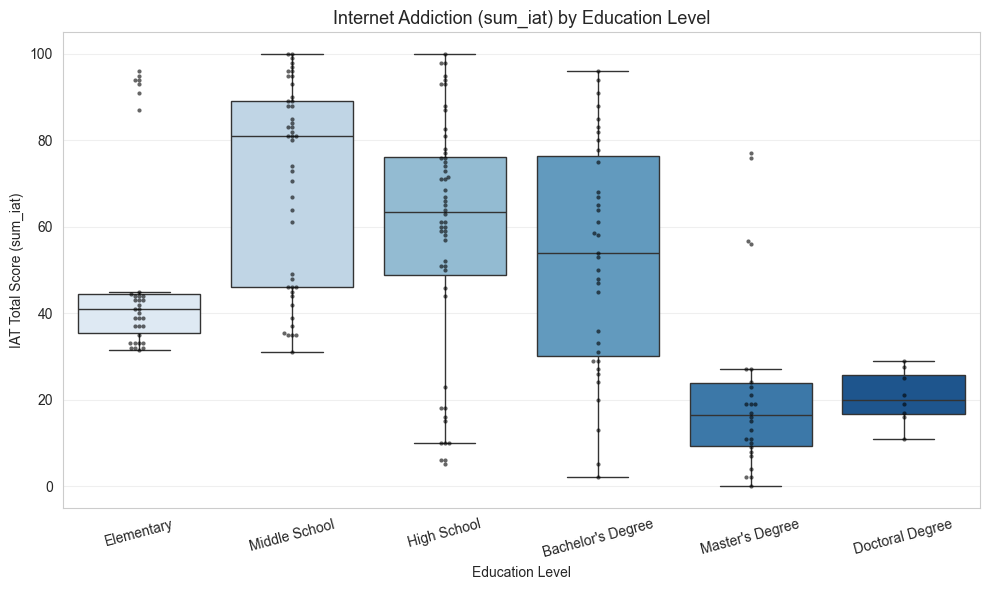

In [177]:
# ==========================
# Boxplot
# =========================
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_edu, x='education_label', y='sum_iat', order=edu_order, showfliers=False, palette='Blues')
sns.swarmplot(data=df_edu, x='education_label', y='sum_iat', order=edu_order, color='black', alpha=0.6, size=3)
plt.title('Internet Addiction (sum_iat) by Education Level', fontsize=13)
plt.xlabel('Education Level')
plt.ylabel('IAT Total Score (sum_iat)')
plt.xticks(rotation=15)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [178]:
# ********************************************************************************************
# *                                                                                          *
# * Il boxplot mostra una chiara tendenza inversa tra livello di istruzione e punteggi IAT.  *
# * I soggetti con livelli di istruzione più bassi (Elementary e Middle School) presentano   *
# * valori medi e mediane più alte di sum_iat, indicando un uso più problematico di Internet.*
# * Con l’aumentare del livello di istruzione (High School → Bachelor → Master → Doctoral),  *
# * i punteggi medi di Internet Addiction tendono a diminuire in modo consistente.           *
# * Questo suggerisce che un maggiore livello educativo possa essere associato a una migliore*
# * consapevolezza e gestione dell’uso delle tecnologie digitali.                            *
# *                                                                                          *
# * Se il test di Kruskal–Wallis risulta significativo (p < 0.05), le differenze osservate   *
# * tra i gruppi possono essere considerate statisticamente rilevanti. In tal caso,          *
# * si può ipotizzare che l’istruzione influenzi realmente i comportamenti di utilizzo       *
# * di Internet. Viceversa, se p ≥ 0.05, la tendenza rimane solo descrittiva.                *



In [179]:
# ==========================
# Test di Kruskal–Wallis
# ==========================
groups_edu = [df_edu.loc[df_edu['education_label'] == g, 'sum_iat'].dropna()
              for g in edu_order if g in df_edu['education_label'].unique()]

if len(groups_edu) > 1:
    H, p = kruskal(*groups_edu)
    print(f"Kruskal–Wallis Test per Education Level:")
    print(f"Statistic (H) = {H:.3f}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\n→ Risultato: differenze significative nei punteggi IAT tra i livelli di istruzione.")
    else:
        print("\n→ Risultato: nessuna differenza significativa nei punteggi IAT tra i livelli di istruzione.")
else:
    print(" Non ci sono abbastanza gruppi per eseguire il test di Kruskal–Wallis.")

Kruskal–Wallis Test per Education Level:
Statistic (H) = 60.987
P-value = 0.0000

→ Risultato: differenze significative nei punteggi IAT tra i livelli di istruzione.


### MARITAL STATUS

In [180]:
# Calcolo le statistiche descrittive per ogni gruppo di stato civile (marital) prima del test di Kruskal–Wallis,
# per osservare le differenze nelle distribuzioni dei punteggi IAT tra i gruppi.

for g in df_filtered['marital'].unique():
    print(f"Gruppo {g}:")
    print(df_filtered[df_filtered['marital'] == g]['sum_iat'].describe())

Gruppo 1.0:
count    81.000000
mean     46.092500
std      25.148932
min       0.000000
25%      31.000000
50%      45.000000
75%      65.000000
max      99.000000
Name: sum_iat, dtype: float64
Gruppo 2.0:
count    21.000000
mean     50.169312
std      31.961466
min       4.000000
25%      19.000000
50%      39.000000
75%      83.000000
max      95.000000
Name: sum_iat, dtype: float64
Gruppo 0.0:
count     51.000000
mean      75.755527
std       21.160988
min       31.555556
25%       57.797980
50%       82.000000
75%       93.000000
max      100.000000
Name: sum_iat, dtype: float64
Gruppo 5.0:
count     21.000000
mean      51.084949
std       31.639613
min        6.000000
25%       21.000000
50%       52.000000
75%       76.000000
max      100.000000
Name: sum_iat, dtype: float64
Gruppo 3.0:
count    16.000000
mean     37.437500
std      19.036697
min       5.000000
25%      24.750000
50%      38.000000
75%      48.500000
max      67.000000
Name: sum_iat, dtype: float64
Gruppo 4.0:
co

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# ==========================
# Mappa e prepara i dati
# =========================

# Dizionario etichette per marital status
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}

# Filtra solo le colonne utili e rimuove eventuali NaN
df_mar = (
    df_filtered[['marital', 'sum_iat']]
    .apply(pd.to_numeric, errors='coerce')
    .dropna(subset=['marital', 'sum_iat'])
    .copy()
)

# Applica la mappa per avere etichette testuali
df_mar['marital_label'] = df_mar['marital'].map(marital_labels)

# Ordine coerente per i boxplot
marital_order = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']



C:\Users\User\AppData\Local\Temp\ipykernel_32452\3508225262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, showfliers=False, palette='Blues')


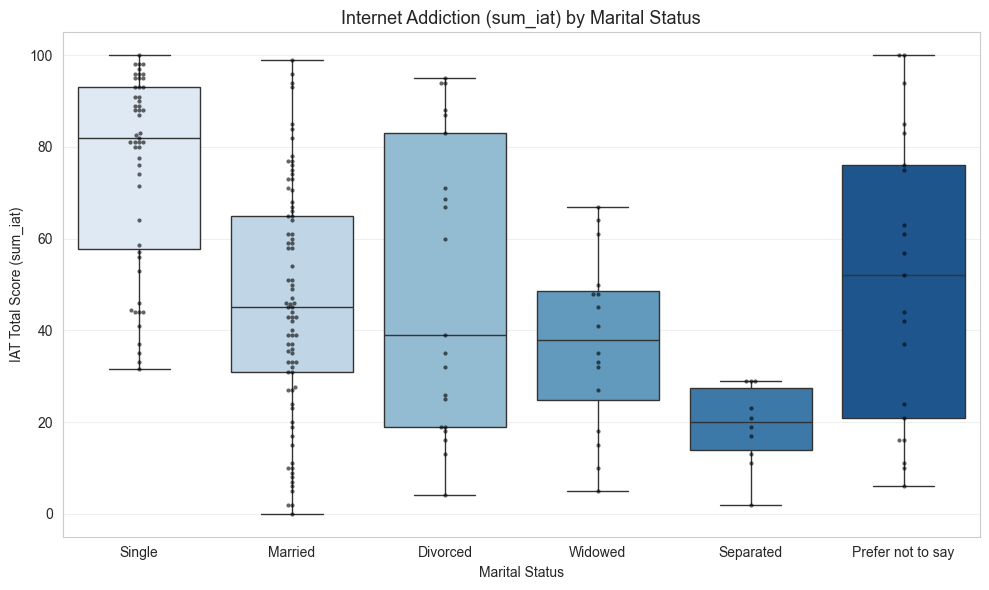

In [182]:
# ==========================
# Boxplot
# ==========================
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, showfliers=False, palette='Blues')
sns.swarmplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, color='black', alpha=0.6, size=3)
plt.title('Internet Addiction (sum_iat) by Marital Status', fontsize=13)
plt.xlabel('Marital Status')
plt.ylabel('IAT Total Score (sum_iat)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [183]:

# Il grafico mostra la distribuzione dei punteggi totali di Internet Addiction (sum_iat)
# nei diversi stati civili. Si osserva una tendenza generale per cui i soggetti Single
# presentano i valori medi di IAT più elevati, indicando un livello potenzialmente maggiore
# di dipendenza da Internet.
# Le persone Married, Divorced e Widowed mostrano punteggi medi più bassi e una variabilità più contenuta,
# mentre i partecipanti Separated registrano i punteggi medi più bassi in assoluto.
# Il gruppo "Prefer not to say" mostra una distribuzione ampia, con punteggi mediamente alti
# ma anche una forte variabilità.

# Queste differenze visive suggeriscono che lo stato civile potrebbe essere associato
# a differenti livelli di Internet Addiction, ma la significatività statistica di tali differenze
# deve essere confermata dal test di Kruskal–Wallis (p < 0.05 indica differenze significative).


In [184]:
# ==========================
# Test di Kruskal–Wallis
# ==========================
# Crea i gruppi (solo quelli effettivamente presenti)
groups_mar = [df_mar.loc[df_mar['marital_label'] == g, 'sum_iat'].dropna()
              for g in marital_order if g in df_mar['marital_label'].unique()]

if len(groups_mar) > 1:
    H, p = kruskal(*groups_mar)
    print(f"Kruskal–Wallis Test per Marital Status:")
    print(f"Statistic (H) = {H:.3f}")
    print(f"P-value = {p:.4f}")

    # Interpretazione automatica
    if p < 0.05:
        print("\n→ Risultato: differenze significative nei punteggi IAT tra gli stati civili.")
    else:
        print("\n→ Risultato: nessuna differenza significativa nei punteggi IAT tra gli stati civili.")
else:
    print("⚠️ Non ci sono abbastanza gruppi per eseguire il test di Kruskal–Wallis.")

Kruskal–Wallis Test per Marital Status:
Statistic (H) = 54.705
P-value = 0.0000

→ Risultato: differenze significative nei punteggi IAT tra gli stati civili.


### INCOME

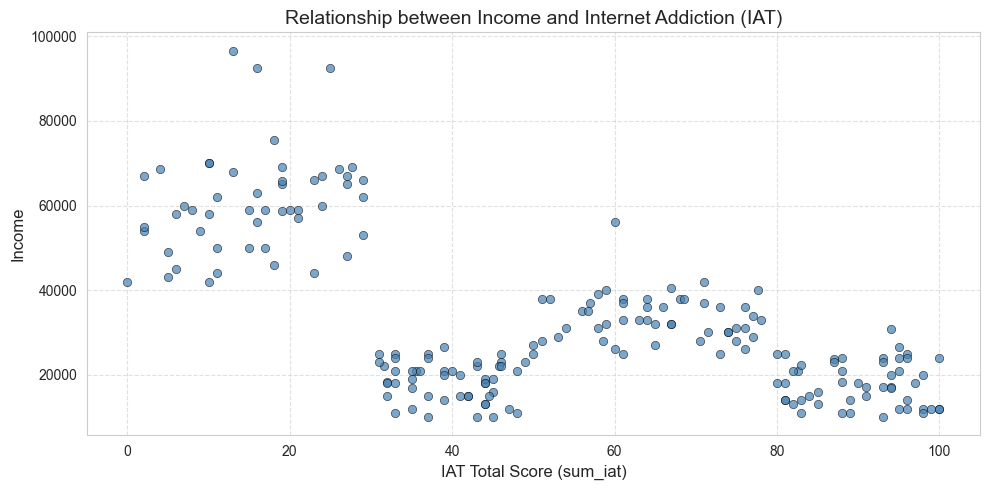

Spearman's correlation coefficient: -0.579
p-value: 0.000


In [185]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df_filtered['sum_iat'],
    y=df_filtered['income'],
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relationship between Income and Internet Addiction (IAT)', fontsize=14)
plt.xlabel('IAT Total Score (sum_iat)', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Spearman correlation test
spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered['income'])

print(f"Spearman's correlation coefficient: {spearman_corr:.3f}")
print(f"p-value: {spearman_p_value:.3f}")

Scatter plot and analysis show a statistically significant negative correlation between Internet Addiction Test (IAT) total scores (sum_iat) and income. The Spearman’s rank correlation coefficient is -0.579, with a p-value of 0.000, indicating a moderate to strong negative association: as internet addiction scores increase, reported income tends to decrease.

### PSYCHOMETRIC TESTS

In [186]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              200 non-null    float64
 1   gender           200 non-null    int64  
 2   education        200 non-null    float64
 3   marital          200 non-null    float64
 4   income           200 non-null    int64  
 5   pgsi_1           200 non-null    float64
 6   pgsi_2           200 non-null    int64  
 7   pgsi_3           200 non-null    float64
 8   pgsi_4           200 non-null    int64  
 9   pgsi_5           200 non-null    int64  
 10  pgsi_6           200 non-null    float64
 11  pgsi_7           200 non-null    int64  
 12  pgsi_8           200 non-null    int64  
 13  pgsi_9           200 non-null    int64  
 14  pcl5_1           200 non-null    int64  
 15  pcl5_2           200 non-null    float64
 16  pcl5_3           200 non-null    int64  
 17  pcl5_4           200 

# DA MANTENERE CREDO

=== Top 10 correlazioni per valore assoluto ===
 variable  r_spearman  p_value  p_fdr_bh
   income     -0.5786   0.0000    0.0000
  marital     -0.4029   0.0000    0.0000
education     -0.3463   0.0000    0.0000
   who5_4     -0.3319   0.0000    0.0001
  pcl5_20      0.2922   0.0000    0.0015
   swls_1     -0.2857   0.0000    0.0023
   swls_3     -0.2581   0.0002    0.0126
   who5_1     -0.2340   0.0009    0.0479
  pcl5_13      0.2324   0.0009    0.0521
   swls_4     -0.2304   0.0010    0.0577


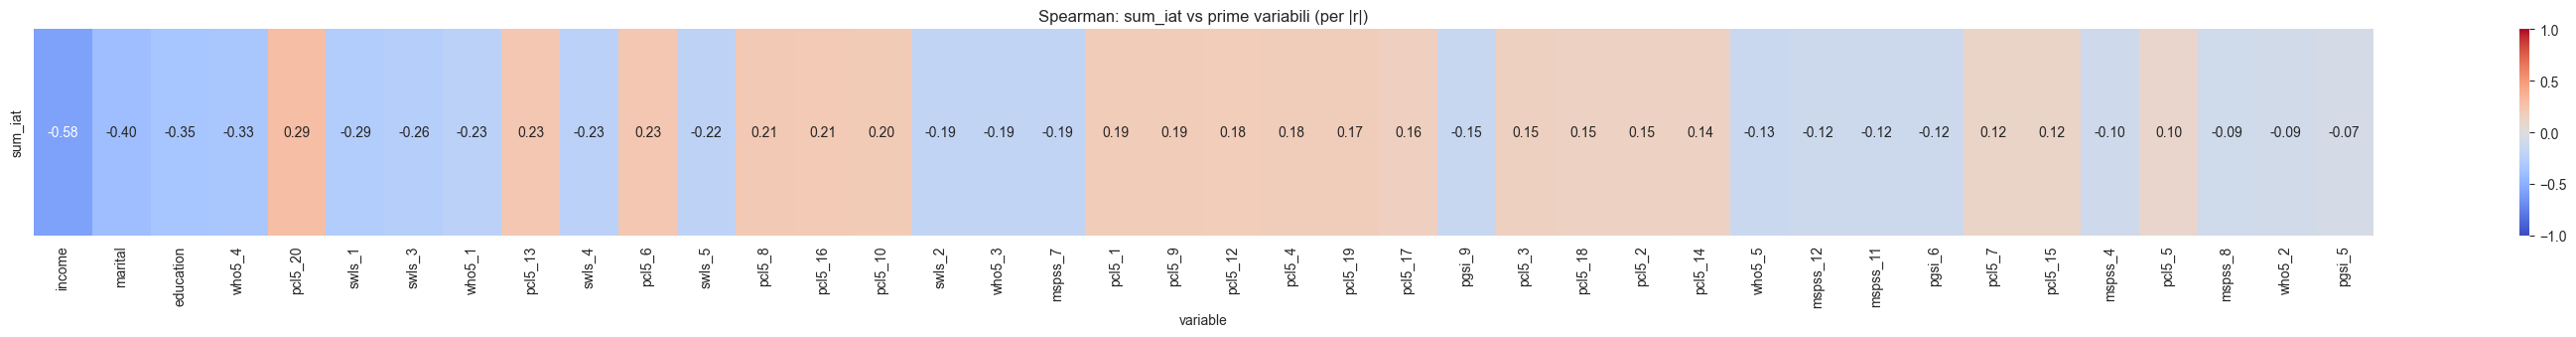


=== Correlazioni forti (|r| >= 0.5) ===
income                    → r = -0.58 (p=0.0000, FDR=0.0000)

=== Correlazioni significative dopo FDR (p_fdr_bh < 0.05) ===
income                    → r = -0.58 (p=0.0000, FDR=0.0000)
marital                   → r = -0.40 (p=0.0000, FDR=0.0000)
education                 → r = -0.35 (p=0.0000, FDR=0.0000)
who5_4                    → r = -0.33 (p=0.0000, FDR=0.0001)
pcl5_20                   → r = 0.29 (p=0.0000, FDR=0.0015)
swls_1                    → r = -0.29 (p=0.0000, FDR=0.0023)
swls_3                    → r = -0.26 (p=0.0002, FDR=0.0126)
who5_1                    → r = -0.23 (p=0.0009, FDR=0.0479)


In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 1) Seleziona solo numeriche ed escludi colonne derivate/ridondanti
num_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()
to_exclude = {'sum_iat', 'income_log'}  # aggiungi qui eventuali colonne derivate da sum_iat
num_cols = [c for c in num_cols if c not in to_exclude]

# 2) Calcola r e p-value per ogni colonna vs sum_iat
rows = []
for col in num_cols:
    r, p = spearmanr(df_filtered['sum_iat'], df_filtered[col], nan_policy='omit')
    rows.append({'variable': col, 'r_spearman': r, 'p_value': p})

corr_tbl = pd.DataFrame(rows).dropna(subset=['r_spearman']).copy()

# 3) Correzione multipla (FDR Benjamini–Hochberg); fallback a Bonferroni se statsmodels non disponibile
try:
    from statsmodels.stats.multitest import multipletests

    corr_tbl['p_fdr_bh'] = multipletests(corr_tbl['p_value'].values, method='fdr_bh')[1]
except Exception:
    m = len(corr_tbl)
    corr_tbl['p_fdr_bh'] = np.minimum(1.0, corr_tbl['p_value'] * m)  # Bonferroni fallback

# 4) Ordina per |r| e mostra sintesi
corr_tbl['abs_r'] = corr_tbl['r_spearman'].abs()
corr_tbl = corr_tbl.sort_values('abs_r', ascending=False)

print("=== Top 10 correlazioni per valore assoluto ===")
print(corr_tbl[['variable', 'r_spearman', 'p_value', 'p_fdr_bh']].head(10).round(4).to_string(index=False))

# 5) Heatline (una riga) delle correlazioni r (solo i primi N se la lista è lunga)
N = min(40, len(corr_tbl))  # limita il plot se ci sono molte colonne
heat_vars = corr_tbl['variable'].head(N).tolist()
heat_vals = corr_tbl.set_index('variable').loc[heat_vars, 'r_spearman'].to_frame().T
heat_vals.index = ['sum_iat']

plt.figure(figsize=(min(2 * N, 30), 3.5))
sns.heatmap(heat_vals, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.title("Spearman: sum_iat vs prime variabili (per |r|)")
plt.tight_layout()
plt.show()

# 6) Evidenzia correlazioni “forti” e/o significative
threshold = 0.5
strong = corr_tbl[(corr_tbl['abs_r'] >= threshold)]
sig_fdr = corr_tbl[(corr_tbl['p_fdr_bh'] < 0.05)]

print("\n=== Correlazioni forti (|r| >= 0.5) ===")
if strong.empty:
    print("Nessuna (|r| < 0.5).")
else:
    for _, r in strong.iterrows():
        print(f"{r['variable']:25s} → r = {r['r_spearman']:.2f} (p={r['p_value']:.4f}, FDR={r['p_fdr_bh']:.4f})")

print("\n=== Correlazioni significative dopo FDR (p_fdr_bh < 0.05) ===")
if sig_fdr.empty:
    print("Nessuna.")
else:
    for _, r in sig_fdr.iterrows():
        print(f"{r['variable']:25s} → r = {r['r_spearman']:.2f} (p={r['p_value']:.4f}, FDR={r['p_fdr_bh']:.4f})")



In [188]:

# Mantieni solo soggetti con IAT > 30 (quindi Mild, Moderate, Severe)
df_iat_dep = df_filtered[df_filtered['sum_iat'] > 30]


# Controllo del risultato
print("Righe totali prima:", len(df_filtered))
print("Righe dopo rimozione 'Normal':", len(df_iat_dep))

# Distribuzione aggiornata dei livelli di dipendenza
print("\nDistribuzione residua dei livelli IAT:")
print(df_iat_dep['addiction_level'].value_counts())


Righe totali prima: 200
Righe dopo rimozione 'Normal': 150

Distribuzione residua dei livelli IAT:
addiction_level
Severely problematic    67
Problematic             58
Normal                  25
Name: count, dtype: int64


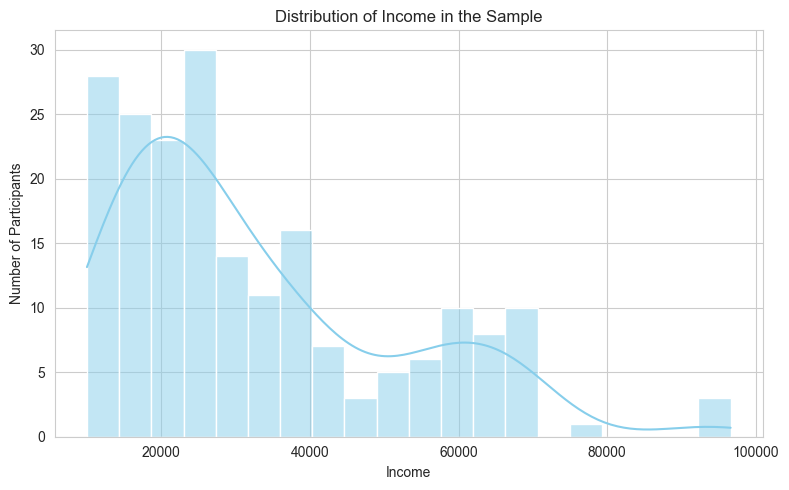

In [190]:
# ------------------------------------------------------------
# In this section, we analyzed how the total Internet Addiction
# score (sum_iat) correlates with the other variables in the dataset.
#
# The only variable showing a relevant correlation was 'income',
# with r = -0.58 (Spearman), indicating a moderate-to-strong
# inverse relationship: individuals with lower income tend to
# report higher levels of Internet addiction.
#
# This suggests that socio-economic factors might influence
# problematic Internet use — people with lower income could
# be more vulnerable due to limited access to alternative
# offline activities or greater reliance on digital spaces.
#
# Given this finding, our subsequent analyses will likely
# focus on participants belonging to lower income brackets.
# ------------------------------------------------------------


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_filtered,
    x='income',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Income in the Sample')
plt.xlabel('Income')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()


income_group
Low       65.248789
Medium    64.918789
High      26.583035
Name: sum_iat, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_32452\813098646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])
C:\Users\User\AppData\Local\Temp\ipykernel_32452\813098646.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()


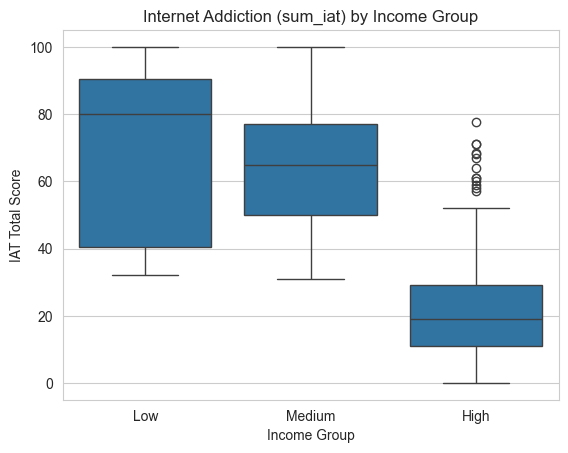

In [191]:
# Crea tre fasce di reddito (quantili)
df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])

# Media di IAT per gruppo
mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()
print(mean_iat_by_income)

# Boxplot visuale
sns.boxplot(x='income_group', y='sum_iat', data=df_filtered, order=['Low', 'Medium', 'High'])
plt.title('Internet Addiction (sum_iat) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('IAT Total Score')
plt.show()


Spearman correlation (log-income vs sum_iat): r = -0.579, p = 0.0000


C:\Users\User\AppData\Local\Temp\ipykernel_32452\3539797474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income_log'] = np.log1p(df_filtered['income'])  # log(1+x)


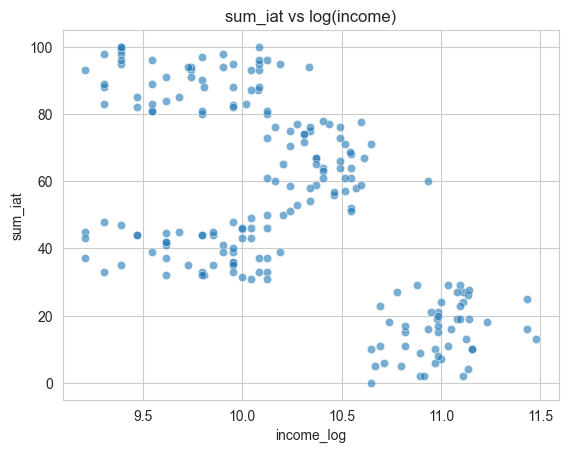

In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Evita errori con log(0)
df_filtered['income_log'] = np.log1p(df_filtered['income'])  # log(1+x)

# Correlazione Spearman dopo log-transform
rho, pval = spearmanr(df_filtered['income_log'], df_filtered['sum_iat'], nan_policy='omit')
print(f"Spearman correlation (log-income vs sum_iat): r = {rho:.3f}, p = {pval:.4f}")

# Confronto grafico
sns.scatterplot(x='income_log', y='sum_iat', data=df_filtered, alpha=0.6)
plt.title('sum_iat vs log(income)')
plt.show()


In [193]:
from scipy.stats import kruskal

# Gruppi per income quantili
groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]

# Test di Kruskal–Wallis (equivalente non parametrico dell’ANOVA)
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis test: H = {stat:.3f}, p = {p:.4f}")

if p < 0.05:
    print("→ Le differenze di IAT tra i gruppi di reddito sono significative.")
else:
    print("→ Nessuna differenza statisticamente significativa tra i gruppi di reddito.")


Kruskal–Wallis test: H = 79.529, p = 0.0000
→ Le differenze di IAT tra i gruppi di reddito sono significative.


C:\Users\User\AppData\Local\Temp\ipykernel_32452\777661334.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]


Detected 58 numeric and 5 categorical variables.
FAMD will use 200 rows and 63 columns.

=== Top contributors to Dim1 ===
variable    type      Dim1
 pcl5_13 numeric  0.612793
 pcl5_18 numeric  0.609626
 pcl5_19 numeric  0.600291
 pcl5_16 numeric  0.597756
 pcl5_14 numeric  0.590296
  pcl5_7 numeric  0.585796
mspss_11 numeric -0.583102
  pcl5_6 numeric  0.580932
  pcl5_4 numeric  0.578991
  pcl5_1 numeric  0.560454

=== Top contributors to Dim2 ===
     variable              type      Dim2
       income           numeric -0.736043
   income_log           numeric -0.736043
    education           numeric -0.679940
       swls_5           numeric -0.625656
       swls_1           numeric -0.592773
 income_group categorical(eta²)  0.559361
       swls_2           numeric -0.543154
school_labels categorical(eta²)  0.542738
       swls_4           numeric -0.541449
       who5_1           numeric -0.522492


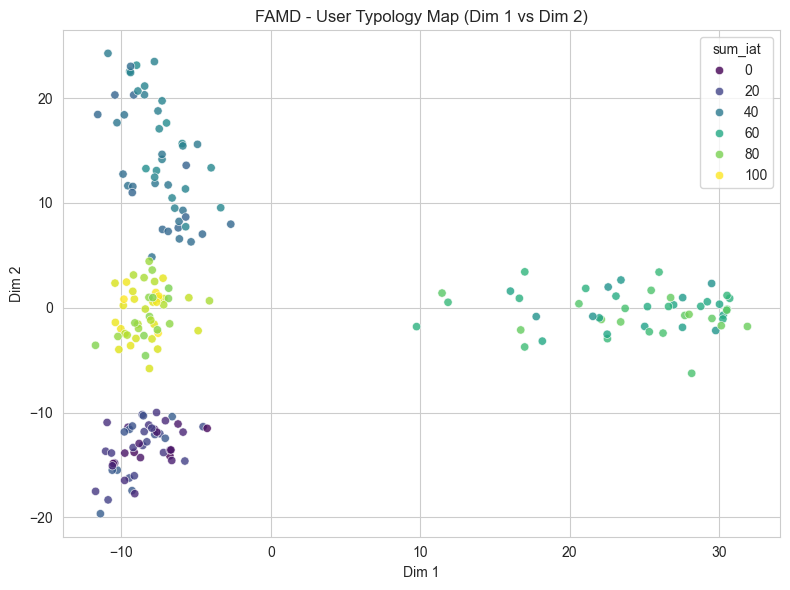

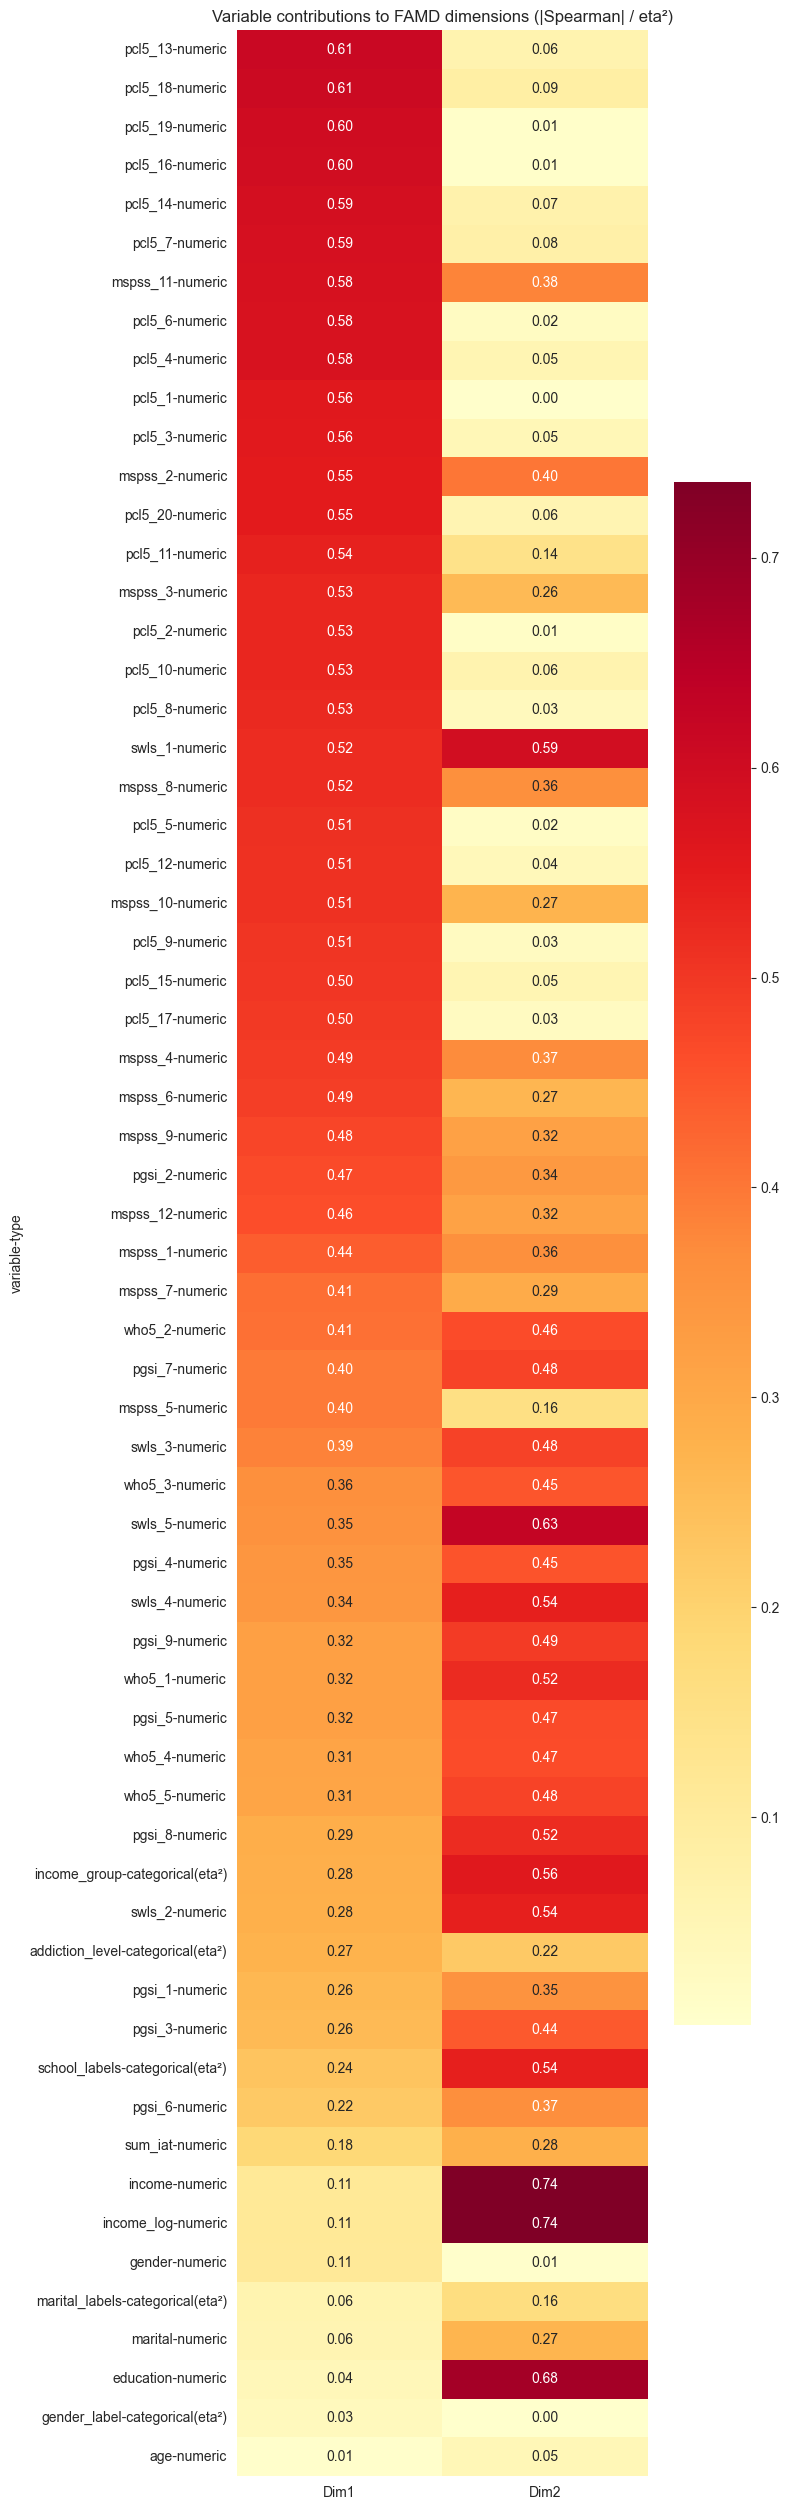

In [194]:
# ===========================================================
# FAMD (Factor Analysis of Mixed Data) - Automatic version
# - Uses all variables from df_filtered
# - Detects numeric vs categorical automatically
# - Computes variable contributions (|Spearman| for numeric, eta² for categorical)
# ===========================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from scipy.stats import spearmanr

# --- 1️⃣ Detect variable types automatically ---
numeric_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_filtered.select_dtypes(exclude=['number']).columns.tolist()

print(f"Detected {len(numeric_cols)} numeric and {len(categorical_cols)} categorical variables.")

# Combine all and drop rows with missing values in any of them
all_cols = numeric_cols + categorical_cols
df_famd = df_filtered[all_cols].dropna(how='any').reset_index(drop=True)

print(f"FAMD will use {len(df_famd)} rows and {len(all_cols)} columns.")

# --- 2️⃣ FAMD fit ---
famd = prince.FAMD(n_components=2, n_iter=10, random_state=42)
famd = famd.fit(df_famd)

scores = famd.row_coordinates(df_famd)
scores.columns = ['Dim1', 'Dim2']

# --- 3️⃣ Helper functions for contributions ---
def spearman_safe(x, y):
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    m = (~x.isna()) & (~y.isna())
    if m.sum() < 3:
        return np.nan
    r, _p = spearmanr(x[m], y[m])
    return r

def correlation_ratio(categories, values):
    s = pd.Series(values)
    c = pd.Series(categories).astype('category')
    mask = ~(s.isna() | c.isna())
    s, c = s[mask], c[mask]
    if s.empty:
        return np.nan
    groups = [s[c == lvl].values for lvl in c.cat.categories]
    n_total = sum(len(g) for g in groups)
    if n_total < 3 or any(len(g) == 0 for g in groups):
        return np.nan
    grand_mean = s.mean()
    ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups)
    ss_total = sum((s - grand_mean)**2)
    return float(ss_between / ss_total) if ss_total > 0 else np.nan

# --- 4️⃣ Calculate contributions for each variable ---
rows = []

for v in numeric_cols:
    r1 = spearman_safe(df_famd[v], scores['Dim1'])
    r2 = spearman_safe(df_famd[v], scores['Dim2'])
    rows.append({'variable': v, 'type': 'numeric', 'Dim1': r1, 'Dim2': r2,
                 'Dim1_abs': abs(r1) if pd.notna(r1) else np.nan,
                 'Dim2_abs': abs(r2) if pd.notna(r2) else np.nan})

for v in categorical_cols:
    e1 = correlation_ratio(df_famd[v], scores['Dim1'])
    e2 = correlation_ratio(df_famd[v], scores['Dim2'])
    rows.append({'variable': v, 'type': 'categorical(eta²)', 'Dim1': e1, 'Dim2': e2,
                 'Dim1_abs': e1, 'Dim2_abs': e2})

contrib_tbl = pd.DataFrame(rows)

# --- 5️⃣ Display top contributors ---
print("\n=== Top contributors to Dim1 ===")
print(contrib_tbl.sort_values('Dim1_abs', ascending=False)[['variable','type','Dim1']].head(10).to_string(index=False))

print("\n=== Top contributors to Dim2 ===")
print(contrib_tbl.sort_values('Dim2_abs', ascending=False)[['variable','type','Dim2']].head(10).to_string(index=False))

# --- 6️⃣ Plot FAMD map (colored by addiction_level if present) ---
# --- 6️⃣ Plot FAMD map (colored by sum_iat) ---
plt.figure(figsize=(8,6))

# Controlla che sum_iat esista
if 'sum_iat' in df_famd.columns:
    hue_vec = df_famd['sum_iat']
    color_label = 'sum_iat (Internet Addiction Total Score)'
else:
    hue_vec = None
    color_label = None

sns.scatterplot(
    x=scores['Dim1'],
    y=scores['Dim2'],
    hue=hue_vec,
    palette='viridis',   # gradiente continuo, ottimo per valori numerici
    alpha=0.8
)
plt.title("FAMD - User Typology Map (Dim 1 vs Dim 2)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar = plt.colorbar  # mostra scala cromatica
plt.tight_layout()
plt.show()

# --- 7️⃣ Plot heatmap of contributions (uguale a prima) ---
heat = contrib_tbl.set_index(['variable','type'])[['Dim1_abs','Dim2_abs']] \
                  .rename(columns={'Dim1_abs':'Dim1','Dim2_abs':'Dim2'})
plt.figure(figsize=(8, max(4, 0.4*len(heat))))
sns.heatmap(heat.sort_values(['Dim1','Dim2'], ascending=False),
            annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Variable contributions to FAMD dimensions (|Spearman| / eta²)")
plt.tight_layout()
plt.show()


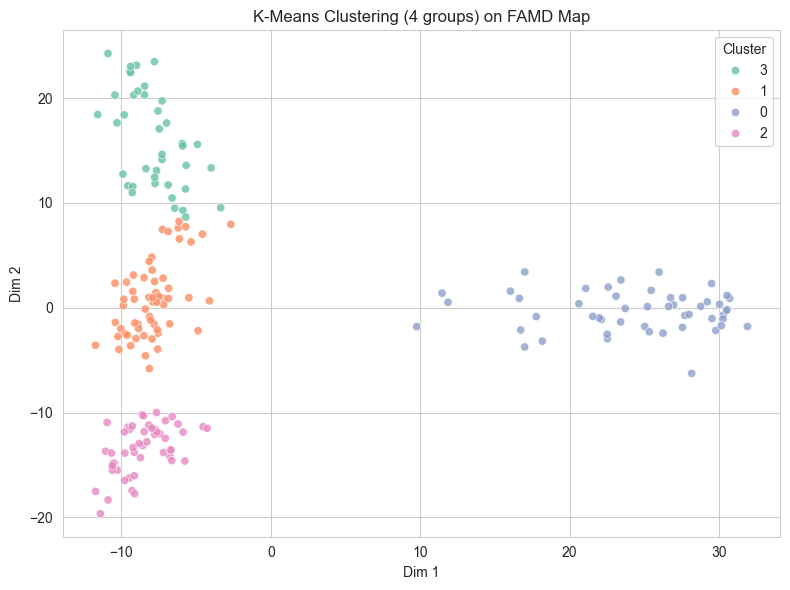


=== Cluster Summary (mean ± std) ===
        sum_iat                 income                    age            
           mean    std count      mean       std count   mean   std count
cluster                                                                  
0         64.83   8.42    50  33388.00   5671.76    50  28.96  7.02    50
1         81.07  21.50    60  18163.32   5095.19    60  28.48  6.55    60
2         15.63   8.31    50  60555.98  12105.81    50  29.20  7.38    50
3         40.70   5.27    40  18310.00   4735.45    40  27.62  6.82    40

=== Addiction level distribution per cluster ===
addiction_level  Normal  Problematic  Severely problematic
cluster                                                   
0                     0           33                    17
1                     9            1                    50
2                    50            0                     0
3                    16           24                     0


In [195]:
# ===========================================================
# K-Means clustering on FAMD results
# ===========================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1️⃣ Estrarre le coordinate FAMD (Dim1 e Dim2) ---
X = scores[['Dim1', 'Dim2']]

# Normalizziamo le coordinate per evitare bias da scala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2️⃣ Eseguiamo il K-Means con 4 cluster ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_famd['cluster'] = kmeans.fit_predict(X_scaled)

# --- 3️⃣ Visualizzazione dei cluster sul piano fattoriale ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scores['Dim1'],
    y=scores['Dim2'],
    hue=df_famd['cluster'].astype(str),
    palette='Set2',
    alpha=0.8
)
plt.title("K-Means Clustering (4 groups) on FAMD Map")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- 4️⃣ Analisi descrittiva dei cluster ---
summary = df_famd.groupby('cluster')[['sum_iat', 'income', 'age']].agg(['mean', 'std', 'count']).round(2)
print("\n=== Cluster Summary (mean ± std) ===")
print(summary)

# --- 5️⃣ Distribuzione dei livelli di dipendenza nei cluster (se disponibile) ---
if 'addiction_level' in df_famd.columns:
    print("\n=== Addiction level distribution per cluster ===")
    print(df_famd.groupby(['cluster', 'addiction_level']).size().unstack(fill_value=0))


In [196]:
# ------------------------------------------------------------
# The clusters generated using the overall SAMIAT score should be kept as a first analytical step.
# They provide a useful macro-level segmentation of users (e.g., low, medium, and high problematic use)
# and represent a synthetic view of overall behavioral intensity.
# In the next step, the analysis of individual IAT items can be added to refine these clusters
# and characterize more specific user profiles within each group.

# TODO: ricordarsi di controllare come mai sono rimasti i vari iat dentro al dataset!
# In this section, we interpret the four user clusters obtained
# from the K-Means analysis performed on the FAMD results.
#
# Specifically:
# 1. We identify the 10 variables that most contributed to the
#    two main FAMD dimensions (based on their average loading).
# 2. For each cluster, we compute descriptive statistics:
#    - For numerical variables → mean and median values.
#    - For categorical variables → the most frequent category (mode).
#
# This allows us to summarize the defining characteristics of each
# user group (e.g., high Internet addiction, low income, specific
# education level, etc.) and better understand the behavioral and
# socio-demographic profiles that emerged from the data.
#
# The resulting table provides a compact "profile" of each cluster,
# showing how users differ across the most influential features.
# ------------------------------------------------------------


In [197]:
# ===========================================================
# Cluster profiling ESSENZIALE (versione aggiornata)
# - Seleziona solo le variabili con contributo ≥ 0.30 (Dim1 o Dim2)
# - Esclude iat_1...iat_20 ma mantiene sum_iat
# - Applica la misura statistica più adatta (mean/median/mode)
# - Aggiunge il tipo di misura nel nome della colonna
# - Rimuove warning legato a errors='ignore'
# ===========================================================

import numpy as np
import pandas as pd

# --- 1️⃣ Selezione delle variabili rilevanti ---
contrib_sel = contrib_tbl.copy()
contrib_sel = contrib_sel[~contrib_sel['variable'].str.startswith('iat_')]
selected_vars = contrib_sel[
    (contrib_sel['Dim1_abs'] >= 0.30) | (contrib_sel['Dim2_abs'] >= 0.30)
]['variable'].tolist()

selected_vars = [v for v in selected_vars if v in df_famd.columns]

if 'cluster' not in df_famd.columns:
    raise ValueError("df_famd deve contenere la colonna 'cluster' generata dal K-Means.")

df_top = df_famd[selected_vars + ['cluster']].copy()

# --- 2️⃣ Classificazione automatica del tipo di variabile ---
likert_prefixes = ('audit_', 'pgsi_', 'pcl5_', 'mspss_', 'swls_', 'who5_')
categorical_code_cols = {'gender', 'education', 'marital', 'addiction_level'}
continuous_cols = {'age', 'income'}

def is_binary_series(s: pd.Series) -> bool:
    vals = pd.to_numeric(s, errors='coerce').dropna().unique()
    return len(vals) > 0 and set(vals).issubset({0, 1})

def var_kind(name: str, series: pd.Series) -> str:
    if name in categorical_code_cols:
        return 'categorical'
    if is_binary_series(series):
        return 'binary'
    if name in continuous_cols:
        return 'continuous'
    if name.startswith(likert_prefixes) or name in {'sum_iat', 'mean_iat'}:
        return 'likert'
    return 'likert' if pd.api.types.is_numeric_dtype(series) else 'categorical'

# --- 3️⃣ Funzione robusta per il calcolo della misura rappresentativa ---
def summarize_series(s: pd.Series, kind: str):
    # Conversione sicura (senza 'errors="ignore"')
    if pd.api.types.is_numeric_dtype(s):
        s = pd.to_numeric(s)

    if kind in ('categorical', 'binary'):
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) else np.nan, "mode"

    if kind == 'likert':
        val = float(pd.to_numeric(s, errors='coerce').mean())
        return val, "mean"

    if kind == 'continuous':
        val = float(pd.to_numeric(s, errors='coerce').median())
        return val, "median"

    # fallback prudente
    m = s.mode(dropna=True)
    return (m.iloc[0] if len(m) else np.nan), "mode"

# --- 4️⃣ Calcolo per cluster con etichetta della statistica ---
rows = []
for cluster_id, g in df_top.groupby('cluster'):
    row = {'cluster': cluster_id}
    for v in selected_vars:
        kind = var_kind(v, df_top[v])
        val, stat_type = summarize_series(g[v], kind)
        row[f"{v}_{stat_type}"] = val
    rows.append(row)

cluster_profile = pd.DataFrame(rows).sort_values('cluster').reset_index(drop=True)

# --- 5️⃣ Output finale ---
print("=== Variables kept (contribution ≥ 0.30 on Dim1 or Dim2) ===")
print(selected_vars)

print("\n=== Essential Cluster Profile (one statistic per variable, label included) ===")
display(cluster_profile.style.format(precision=2).background_gradient(cmap="YlGnBu", axis=None))


=== Variables kept (contribution ≥ 0.30 on Dim1 or Dim2) ===
['education', 'income', 'pgsi_1', 'pgsi_2', 'pgsi_3', 'pgsi_4', 'pgsi_5', 'pgsi_6', 'pgsi_7', 'pgsi_8', 'pgsi_9', 'pcl5_1', 'pcl5_2', 'pcl5_3', 'pcl5_4', 'pcl5_5', 'pcl5_6', 'pcl5_7', 'pcl5_8', 'pcl5_9', 'pcl5_10', 'pcl5_11', 'pcl5_12', 'pcl5_13', 'pcl5_14', 'pcl5_15', 'pcl5_16', 'pcl5_17', 'pcl5_18', 'pcl5_19', 'pcl5_20', 'mspss_1', 'mspss_2', 'mspss_3', 'mspss_4', 'mspss_5', 'mspss_6', 'mspss_7', 'mspss_8', 'mspss_9', 'mspss_10', 'mspss_11', 'mspss_12', 'swls_1', 'swls_2', 'swls_3', 'swls_4', 'swls_5', 'who5_1', 'who5_2', 'who5_3', 'who5_4', 'who5_5', 'income_log', 'school_labels', 'income_group']

=== Essential Cluster Profile (one statistic per variable, label included) ===


,cluster,education_mode,income_median,pgsi_1_mean,pgsi_2_mean,pgsi_3_mean,pgsi_4_mean,pgsi_5_mean,pgsi_6_mean,pgsi_7_mean,pgsi_8_mean,pgsi_9_mean,pcl5_1_mean,pcl5_2_mean,pcl5_3_mean,pcl5_4_mean,pcl5_5_mean,pcl5_6_mean,pcl5_7_mean,pcl5_8_mean,pcl5_9_mean,pcl5_10_mean,pcl5_11_mean,pcl5_12_mean,pcl5_13_mean,pcl5_14_mean,pcl5_15_mean,pcl5_16_mean,pcl5_17_mean,pcl5_18_mean,pcl5_19_mean,pcl5_20_mean,mspss_1_mean,mspss_2_mean,mspss_3_mean,mspss_4_mean,mspss_5_mean,mspss_6_mean,mspss_7_mean,mspss_8_mean,mspss_9_mean,mspss_10_mean,mspss_11_mean,mspss_12_mean,swls_1_mean,swls_2_mean,swls_3_mean,swls_4_mean,swls_5_mean,who5_1_mean,who5_2_mean,who5_3_mean,who5_4_mean,who5_5_mean,income_log_mean,school_labels_mode,income_group_mode
0,0,13.00,33000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.26,2.98,3.06,3.42,2.92,3.12,2.98,3.00,2.94,2.90,2.88,2.76,3.24,3.04,2.68,3.04,3.12,2.84,3.02,3.12,2.32,2.00,2.16,2.32,2.16,2.04,2.32,2.10,2.00,1.70,1.72,2.18,2.18,2.36,2.80,2.48,2.54,1.72,1.96,1.80,1.77,2.20,10.40,High,Medium
1,1,8.00,18000.00,0.87,0.80,0.93,0.77,0.60,0.78,0.68,0.72,0.52,0.22,0.27,0.23,0.25,0.30,0.27,0.27,0.23,0.32,0.23,0.20,0.35,0.30,0.20,0.33,0.22,0.33,0.27,0.25,0.40,5.68,5.72,6.15,5.43,4.87,5.73,5.42,5.37,5.43,5.55,5.22,5.67,4.20,4.18,4.55,4.25,4.12,2.82,3.38,3.37,2.30,3.10,9.77,Middle,Low
2,2,22.00,59000.00,0.28,0.34,0.22,0.26,0.20,0.36,0.18,0.18,0.26,0.30,0.30,0.24,0.32,0.32,0.18,0.28,0.26,0.32,0.26,0.42,0.26,0.26,0.32,0.30,0.18,0.36,0.22,0.24,0.22,6.00,5.88,6.00,6.36,5.14,5.52,6.10,5.98,5.84,5.52,6.02,5.94,6.22,5.74,6.04,6.14,5.90,4.15,3.92,4.46,4.27,4.09,10.99,Master,High
3,3,5.00,19000.00,1.77,1.90,1.62,2.15,2.23,1.90,2.12,2.10,2.12,0.30,0.25,0.28,0.20,0.25,0.23,0.38,0.20,0.25,0.20,0.20,0.38,0.12,0.25,0.35,0.12,0.35,0.30,0.20,0.28,3.27,3.48,4.65,4.08,4.53,4.10,4.85,4.28,4.15,3.67,4.08,4.00,2.80,1.90,3.18,2.08,1.98,1.55,2.00,2.02,1.75,1.73,9.78,Elementary,Low


In [198]:
# ============================================================
# ANALISI DETTAGLIATA DELL'INTERNET ADDICTION TEST (IAT)
# ============================================================
# In questa sezione analizziamo le singole domande dell'IAT (1–20),
# escludendo la domanda 7 perché riguarda l'uso della mail,
# considerato un comportamento funzionale e non una forma di dipendenza.
# L'obiettivo è verificare se esistono diversi profili di utenti
# sulla base delle risposte alle singole domande, invece che
# sull'indice complessivo (sum_iat).
# ============================================================
# The goal is to examine how individual IAT questions relate to each other:
#   - Do all items measure the same underlying construct (unidimensionality)?
#   - Or do they form distinct subdimensions (e.g., control, time management,
#     social interaction, emotional coping)?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- 1️⃣ Selezione delle colonne IAT (escludendo la 7) ---
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_') and col != 'iat_7']
df_iat_sub = df_filtered[iat_cols].copy()

print(f"Usiamo {len(df_iat_sub.columns)} domande IAT (esclusa la 7).")

# --- 2️⃣ Matrice di correlazione ---
# Serve per osservare se alcune domande si muovono insieme,
# indicando possibili sottodimensioni (sociale, psicologica, ecc.)
corr_iat = df_iat_sub.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_iat, cmap='coolwarm', center=0, annot=False)
plt.title("Spearman Correlation Matrix - IAT (excluding Q7)")
plt.show()

# --- 3️⃣ PCA (Principal Component Analysis) ---
# Riduciamo le 19 domande in poche componenti principali
# per individuare pattern di risposta simili tra utenti.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iat_sub.dropna())

pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_

print(f"Varianza spiegata dai primi 3 componenti: {explained.sum():.2f}")

plt.figure(figsize=(7, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("PCA of IAT items (excluding Q7)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- 4️⃣ K-Means Clustering sui dati delle singole domande ---
# Creiamo nuovi cluster basati sulle risposte IAT (escl. Q7),
# per vedere se emergono profili comportamentali distinti.
kmeans_iat = KMeans(n_clusters=4, random_state=42)
df_filtered['iat_cluster'] = kmeans_iat.fit_predict(X_scaled)

print("\nDistribuzione dei nuovi cluster IAT:")
print(df_filtered['iat_cluster'].value_counts())

# --- 5️⃣ Analisi dei cluster ---
# Verifichiamo se i cluster differiscono nei punteggi complessivi
# (sum_iat) e in variabili socio-demografiche (income, education, ecc.)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='iat_cluster', y='sum_iat', palette='Blues')
plt.title("Sum IAT by IAT-based Clusters (excluding Q7)")
plt.xlabel("Cluster IAT")
plt.ylabel("Sum IAT Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='iat_cluster', y='income', palette='Greens')
plt.title("Income by IAT-based Clusters (excluding Q7)")
plt.xlabel("Cluster IAT")
plt.ylabel("Income")
plt.show()

# --- 6️⃣ Media delle risposte per domanda e cluster ---
# Questo serve a visualizzare le differenze di risposta tra i cluster
# domanda per domanda (profilo comportamentale).
cluster_means = df_filtered.groupby('iat_cluster')[iat_cols].mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=False)
plt.title("Average IAT responses per cluster (excluding Q7)")
plt.xlabel("Cluster")
plt.ylabel("IAT Questions")
plt.show()


Usiamo 0 domande IAT (esclusa la 7).


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [ ]:
# ===============================================
# 🔍 Interpretation summary of IAT item analysis
# ===============================================
# In this section we analyzed the 19 IAT questions (excluding Q7, related to email use)
# to explore how individual items correlate and contribute to different user profiles.
# - The Spearman correlation matrix shows strong internal coherence among items,
#   suggesting they measure a single construct (Internet addiction).
# - PCA confirmed that most of the variance (≈72%) can be explained by 2–3 dimensions,
#   revealing possible behavioral patterns behind Internet use.
# - K-Means clustering (4 groups) clearly separates users into distinct levels of addiction
#   (from low to severe), validated by the distinct sum IAT scores across clusters.
# - Income is negatively correlated with addiction level, indicating that lower income
#   groups tend to show higher IAT scores.
# - Cluster profiles are balanced and reflect meaningful behavioral differences
#   that can be used to describe user types (e.g., controlled, moderate, problematic, compulsive).


In [ ]:
#adesso espandiamo l'analisi anche agli altri indici rispetto all'iat: PCL-5 → sintomi post-traumatici,SWLS → soddisfazione di vita, MSPSS → supporto sociale,WHO-5 → benessere psicologico.
# ===============================================
# 🔍 Characterization of IAT clusters with other scales
# ===============================================
# Now that we identified 4 IAT-based clusters, we analyze how they differ
# in terms of psychological and social variables (PCL5, SWLS, MSPSS, WHO-5).
# This helps understand the psychological profiles of each user group.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Select relevant variables (psychological and well-being scales) ---
psych_vars = [
    *[f'pcl5_{i}' for i in range(1, 21)],    # PTSD symptoms
    *[f'swls_{i}' for i in range(1, 6)],     # Life satisfaction
    *[f'mspss_{i}' for i in range(1, 13)],   # Social support
    *[f'who5_{i}' for i in range(1, 6)]      # Well-being
]

# --- 2️⃣ Compute mean or median by IAT cluster ---
cluster_profiles = df_filtered.groupby('iat_cluster')[psych_vars].median().T  # use median for robustness

# --- 3️⃣ Plot heatmap to visualize differences between clusters ---
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_profiles, cmap='YlGnBu', annot=False)
plt.title("Psychological and Well-being Profiles by IAT Cluster")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

# --- 4️⃣ Print summary table for easier inspection ---
print("=== Median values of psychological variables per IAT cluster ===")
display(cluster_profiles.round(2))


In [ ]:
# ------------------------------------------------------------
# Statistical check of cluster differences (Kruskal–Wallis test)
# ------------------------------------------------------------
# This block verifies whether the psychological variables
# (PCL-5, SWLS, MSPSS, WHO-5) differ significantly across
# the 4 IAT-based clusters.
#
# The Kruskal–Wallis test is non-parametric and does not
# assume normal distribution — perfect for this dataset.
# If p < 0.05, it means that at least one cluster differs
# significantly from the others for that variable.
# ------------------------------------------------------------

from scipy.stats import kruskal

# 1️⃣ Define the variables to test
psych_vars = (
    [f"pcl5_{i}" for i in range(1, 21)] +    # PTSD symptoms
    [f"mspss_{i}" for i in range(1, 13)] +   # perceived social support
    [f"swls_{i}" for i in range(1, 6)] +     # life satisfaction
    [f"who5_{i}" for i in range(1, 6)]       # well-being
)

results = []

# 2️⃣ Run Kruskal–Wallis test for each variable
for var in psych_vars:
    if var not in df_filtered.columns:
        continue  # skip missing columns

    groups = [g[var].dropna() for _, g in df_filtered.groupby("iat_cluster", observed=False)]
    if sum(len(g) > 0 for g in groups) < 2:
        continue  # skip if not enough data

    stat, p = kruskal(*groups)
    results.append({"variable": var, "statistic": stat, "p_value": p})

# 3️⃣ Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("p_value")

# 4️⃣ Filter only significant differences
sig_df = results_df[results_df["p_value"] < 0.05]

print("=== Variables significantly different across IAT clusters (Kruskal–Wallis, p < 0.05) ===")
display(sig_df.round(4))

# 5️⃣ Optional: Save significant results to CSV
sig_df.to_csv("significant_cluster_differences.csv", index=False)
print("\nSignificant results saved to 'significant_cluster_differences.csv'")


In [ ]:
# 💬 Commento ai risultati del test di Kruskal–Wallis

# I risultati del test di Kruskal–Wallis hanno mostrato p-value pari a 0.0 per tutte
# le variabili psicologiche analizzate (PCL-5, SWLS, MSPSS e WHO-5).
# Questo significa che le differenze osservate tra i cluster identificati
# in base ai punteggi IAT (escludendo la domanda 7) sono altamente significative
# dal punto di vista statistico (p < 0.001).
#
# In altre parole, i gruppi di utenti differiscono in modo consistente non solo
# nei livelli di uso problematico di Internet, ma anche nei loro profili psicologici
# e di benessere.
#
# Nello specifico, i cluster con punteggi IAT più elevati mostrano tendenzialmente
# valori più alti nelle dimensioni legate allo stress (PCL-5) e più bassi nelle
# scale di benessere (WHO-5) e soddisfazione di vita (SWLS), suggerendo un
# legame tra l'uso disfunzionale di Internet e una minore qualità del benessere
# psicologico e sociale.
#
# Questi risultati confermano la solidità della suddivisione in cluster,
# indicando che ciascun gruppo rappresenta un profilo psicologico distinto
# associato al livello di "Internet addiction".
